In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
import time
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Hartrees to Kelvin
H_to_GHz = 6579689.74479021 # conversion of Hartrees to GigaHertz

tol1 = 1.2e-15 # tolerance where neccessary

tol2 = 1

# $r_6 = \frac{2\mu C_6}{\hbar^2}^{1/4}$

In [5]:
R1 = 3.5 # starting posistion r1 in ao
R2 = 704 # ending posistion r2 in ao
dr1 = 0.08 # step spacing in ao

scattering_lengths2 = [0.007193570433782367, 0.12405492049033923, 0.24075770270411984, 0.3573026260794478, 0.4736897941444462, 0.5899204706223297, 0.7059937666541258, 0.8219106559821131, 0.9376723563800081, 1.0532782992253364, 1.1687292902208701, 1.2840251860871355, 1.3991674537939403, 1.5141557416865072, 1.628990429818784, 1.7436724923781393, 1.8582020070124414, 1.9725788153239707, 2.086804394643355, 2.2008784577353366, 2.3148016044754876, 2.428574135433731, 2.542196561814907, 2.655669531126911, 2.7689925677853533, 2.8821669686007274, 2.995192570453047, 3.1080703624401558, 3.2208000322347865, 3.3333821852972827, 3.44581774539589, 3.558106384217049, 3.6702490336552884, 3.7822456245392444, 3.8940966911067023, 4.005802844205998, 4.117364093318975, 4.22878116510293, 4.340054389609798, 4.451183857082434, 4.562170069395624, 4.6730138613220005, 4.783714656116961, 4.894273648521409, 5.004691066794409, 5.114966957552023, 5.225101697711282, 5.335096312308206, 5.444950358812528, 5.5546646361845, 5.664239261996604, 5.773675073863491, 5.882971784016794, 5.9921300136788025, 6.101150520471426, 6.210033278295308, 6.318778412846878, 6.427386821908186, 6.53585847485541, 6.644193711699741, 6.75239333217485, 6.860457225467569, 6.968385749760512, 7.076179555136082, 7.1838388804915905, 7.291363705184526, 7.398754970118539, 7.506012681749578, 7.613137249646004, 7.720128997648981, 7.826988028663902, 7.933715219456677, 8.040310447705876, 8.146774777412329, 8.253107363369233, 8.359309335824092, 8.4653808980051, 8.571322315740666, 8.677134037696318, 8.782816257467722, 8.888369628500424, 8.993793631528392, 9.099089629955595, 9.20425725178679, 9.30929703653836, 9.414209564443441, 9.518994703921539, 9.623653171623761, 9.728185398510057, 9.832591222733056, 9.936871089379727, 10.04102543150367, 10.145054506906476, 10.248958690386479, 10.352738116663394, 10.456393625905722, 10.559924820233597, 10.663332545841627, 10.766616738204467, 10.869778303849502, 10.972816686328247, 11.075733128103852, 11.178527341930428, 11.28119956959311, 11.383750441173428, 11.486180166965784, 11.588489008726034, 11.69067714151061, 11.792745100488549, 11.8946928325303, 11.996521403940237, 12.098230303305876, 12.199820198078154, 12.301291343005628, 12.402644024999104, 12.503878997392784, 12.604995176611075, 12.705994230268942, 12.806876246997401, 12.907640466836282, 13.008288558985894, 13.10882034642711, 13.209236231559068, 13.309535339707704, 13.409719103842122, 13.509788618992266, 13.609742943101764, 13.709582004229317, 13.809306282045185, 13.90891691112427, 14.00841376466726, 14.107797079636018, 14.207067157191583, 14.306224193124251, 14.405268683418049, 14.504200671610176, 14.60302071526406, 14.701728793384797, 14.800325433427785, 14.898810895893966, 14.99718407831395, 15.095447003342624, 15.19360053101894, 15.291643075181387, 15.389575056837309, 15.487398793366653, 15.585111454231264, 15.682716338084237, 15.780211044916651, 15.877598470146719, 15.974876592513928, 16.07204784712253, 16.16911016818882, 16.2660645116422, 16.362913293253303, 16.459654413881953, 16.55628817920947, 16.652815715786147, 16.749236548818534, 16.84555205752119, 16.941762085066674, 17.037865969374355, 17.13386508937901, 17.22975951539012, 17.325549170492497, 17.421233438538408, 17.516814271475685, 17.61229183535654, 17.70766439602262, 17.802934585689563, 17.898100907580414, 17.993165261204734, 18.08812581418871, 18.18298488899555, 18.27774146832622, 18.372395815183033, 18.46694862315766, 18.5614003011779, 18.65575050523567, 18.749999990899305, 18.84414886030874, 18.938197471717828, 19.03214548309624, 19.125994124224505, 19.219741901602752, 19.313391186914142, 19.40694096439671, 19.500391850119282, 19.593743652736965, 19.686997748799318, 19.78015256494924, 19.873209743343878, 19.96616915556009, 20.059031455369457, 20.151795474769187, 20.24446321899612, 20.337034134200476, 20.42950762612254, 20.521885248130747, 20.6141669803288, 20.706351684724144, 20.798441966030538, 20.890436143793266, 20.98233518023319, 21.074139204428285, 21.16584825198269, 21.257463161468028, 21.34898340610394, 21.440409883000015, 21.531741881298306, 21.622980772083903, 21.71412586387484, 21.805178214970912, 21.896136898561338, 21.98700316632369, 22.07777710718188, 22.168458410955846, 22.25904788472749, 22.34954503191288, 22.439951067285744, 22.530265265576755, 22.620488550141275, 22.71062016554398, 22.800661622219693, 22.8906121329043, 22.980472660141068, 23.070243076903477, 23.159923144486058, 23.249513902678572, 23.33901459938887, 23.42842650851686, 23.517749061736623, 23.606982745197445, 23.696128116083237, 23.785184492339095, 23.87415303626821, 23.96303331142315, 24.051826052944893, 24.1405309645293, 24.22914834456795, 24.31767869896225, 24.40612214957928, 24.494478553401063, 24.58274836169412, 24.67093228944316, 24.759029393057343, 24.84704105865087, 24.934966776438305, 25.02280686321489, 25.11056112356463, 25.19823123501219, 25.2858157118068, 25.37331510774786, 25.460730588712902, 25.548061342157318, 25.63530822236818, 25.722470957589046, 25.809549750683324, 25.896545077616448, 25.98345739325136, 26.070286202293403, 26.157031619922094, 26.24369523023014, 26.330275316142888, 26.41677327288715, 26.503189308873406, 26.589522845981143, 26.675774891153235, 26.76194511734413, 26.848034000985788, 26.93404177485337, 27.019968289980383, 27.105813940655537, 27.191578761539407, 27.27726345315033, 27.362867494470947, 27.44839205318465, 27.53383603514673, 27.619200519884874, 27.70448532336096, 27.789690648186102, 27.874816944173464, 27.959864074256252, 28.04483242268999, 28.129722510020233, 28.21453380453525, 28.299266824747566, 28.383921790150648, 28.468498989824393, 28.552998174262978, 28.637420330157124, 28.721764427522572, 28.806031963309955, 28.89022205385298, 28.974335446897253, 29.05837222463341, 29.14233259857125, 29.22621642261106, 29.31002450806583, 29.39375652288267, 29.47741256844982, 29.560993601979252, 29.64449848635069, 29.727928422747933, 29.811283597241648, 29.89456343549033, 29.977768725161788, 30.060899399814392, 30.143956014526072, 30.22693829872576, 30.30984631685007, 30.392680497470863, 30.475441409115795, 30.558128415323534, 30.640742309347747, 30.72328300382862, 30.805750616251153, 30.888145113056442, 30.97046755257301, 31.052716940681528, 31.1348941467962, 31.216999487972785, 31.299032589947178, 31.3809938675349, 31.46288345812345, 31.54470132005795, 31.62644828490202, 31.708124010013652, 31.7897289691426, 31.87126243797487, 31.952725737649835, 32.03411806204302, 32.11544059143125, 32.196692418211136, 32.277874473111304, 32.35898686137042, 32.44002924808098, 32.52100220469315, 32.601905528526686, 32.68273997263297, 32.76350512250741, 32.84420139044089, 32.924828785180175, 33.005387867535234, 33.08587858366037, 33.166300931129605, 33.24665493402007, 33.32694090351318, 33.40715948889785, 33.487310348694066, 33.56739326192758, 33.64740895583131, 33.727357914005886, 33.80723979322037, 33.88705416935329, 33.966802516167746, 34.04648372525612, 34.12609877352498, 34.205647786078735, 34.28513039294166, 34.36454678591972, 34.44389793456675, 34.52318321061, 34.602402996579684, 34.68155698668054, 34.760646208118864, 34.83967049559103, 34.91862964166522, 34.99752411003771, 35.07635398762241, 35.15511930599585, 35.23382021109703, 35.31245700046374, 35.39102978491671, 35.469538367272044, 35.54798390019033, 35.6263653924149, 35.70468381239051, 35.78293852525224, 35.86113006091963, 35.939258860172465, 36.017324509456444, 36.095327786457695, 36.17326790350033, 36.25114579516287, 36.328961857041776, 36.4067156359834, 36.48440766077621, 36.562038084682605, 36.639605180046615, 36.717111817112446, 36.794557589748564, 36.871940026334485, 36.94926334601642, 37.0265245353832, 37.103725772725376, 37.180864941222545, 37.25794519408663, 37.33496358521303, 37.4119215818075, 37.488819995836316, 37.56565878544121, 37.642437592443486, 37.71915568789362, 37.79581488704337, 37.87241465496794, 37.94895425530456, 38.02543437627917, 38.101856210211636, 38.17821898383355, 38.25452382357272, 38.330768129565065, 38.40695531795835, 38.483083195835725, 38.55915376508164, 38.63516489916284, 38.71111849198852, 38.787014518548524, 38.862852593987235, 38.93863334223929, 39.01435626793744, 39.09002156512584, 39.16562983469755, 39.24118104701371, 39.316675787581254, 39.39211251444346, 39.46749360558124, 39.542817137171724, 39.61808512702733, 39.69329653554107, 39.768451549629155, 39.843550623414686, 39.918593385615175, 39.99358085003579, 40.0685124908755, 40.14338802300329, 40.21820884704806, 40.29297374655198, 40.367684121102165, 40.44233905617759, 40.51693889318786, 40.591484195816285, 40.66597487142558, 40.74041084606163, 40.81479230272866, 40.88911948926656, 40.963392454325124, 41.03761213305941, 41.111776763512154, 41.18588782146008, 41.25994532165362, 41.33394949484068, 41.4078998201084, 41.48179721115891, 41.55564081488308, 41.629431470675655, 41.703169592769825, 41.7768546804315, 41.850487428894176, 41.924066655947364, 41.99759411147566, 42.07106915993309, 42.144491451403226, 42.21786223271464, 42.29118092683209, 42.36444720484944, 42.437661962278746, 42.51082564620793, 42.58393699619799, 42.6569972839142, 42.73000654738231, 42.80296425190004, 42.87587088833901, 42.94872667819211, 43.021531713250546, 43.09428593254168, 43.166989494036564, 43.2396429363984, 43.312245657079266, 43.38479834909123, 43.45730084890724, 43.529753157112836, 43.602155405463144, 43.67450845958874, 43.74681151403406, 43.81906490860086, 43.89126893893849, 43.963423686285665, 44.035529206008626, 44.107585379938534, 44.17959288413867, 44.25155122901904, 44.323461044478584, 44.39532210694087, 44.46713459638328, 44.53889871566852, 44.6106143470329, 44.6822818464935, 44.75390120289514, 44.82547250343189, 44.896996200205336, 44.96847184463159, 45.03990017992908, 45.11128046652087, 45.182613676367055, 45.2538991924927, 45.325138018164665, 45.3963293632506, 45.467473563264505, 45.53857097647961, 45.60962185732269, 45.68062559076708, 45.75158300677607, 45.822494073003746, 45.89335825440645, 45.96417689608439, 46.03494895653322, 46.10567477035312, 46.17635521175835, 46.246989199400346, 46.31757795600143, 46.38812083228595, 46.4586181811534, 46.529070395003984, 46.59947707820094, 46.66983859559217, 46.740154911373914, 46.81042627842114, 46.88065288109619, 46.95083436456424, 47.0209715746326, 47.091063973882044, 47.161112033734554, 47.23111546902124, 47.301074718332856, 47.370989927275744, 47.44086085920474, 47.51068805689385, 47.580471326498504, 47.65021078583089, 47.719906344679416, 47.78955856954898, 47.85916735072591, 47.92873284493718, 47.998255056174045, 48.06773383861417, 48.137169440889174, 48.20656278691269, 48.2759131673762, 48.34522018233735, 48.414484971033936, 48.48370688565226, 48.55288667716865, 48.6220236809345, 48.691118880586295, 48.760171881048194, 48.829182568621164, 48.89815139661629, 48.967078132489995, 49.035963489887116, 49.10480703688769, 49.173608616518365, 49.24236919081978, 49.31108821376267, 49.37976606186573, 49.44840236905214, 49.5169978452097, 49.58555238300932, 49.654065924821836, 49.72253854165776, 49.79097065337019, 49.85936192295836, 49.927712632079164, 49.99602343307498, 50.064293127349465, 50.13252304865685, 50.20071293120503, 50.268862384321366, 50.33697210049739, 50.40504195607475, 50.47307226288948, 50.541062835335566, 50.60901341642227, 50.67692459633608, 50.744796429563486, 50.81262902797762, 50.8804222901446, 50.94817663694955, 51.015891864931234, 51.08356804926665, 51.15120536759636, 51.21880501084907, 51.28636514854325, 51.35388606312501, 51.4213684668371, 51.48881303678562, 51.55621979098425, 51.6235885190661, 51.69091761391329, 51.75821050862579, 51.82546382051253, 51.892679540260126, 51.95985810087953, 52.02699918023857, 52.094102054284704, 52.161168026609246, 52.22819629991466, 52.29518778576053, 52.362140654770954, 52.42905828440224, 52.49593737775327, 52.56277991220926, 52.62958561366977, 52.69635476475538, 52.76308712594596, 52.829783542284105, 52.89644201397265, 52.96306524201654, 53.02965153868179, 53.096201305051125, 53.16271562876636, 53.229193509674516, 53.29563491562647, 53.36204161857267, 53.428411710087325, 53.49474599996496, 53.56104523583759, 53.62730791706772, 53.693536034697736, 53.759728163197416, 53.82588539916868, 53.89200712959344, 53.95809409097905, 54.02414554978661, 54.09016201001903, 54.15614414826079, 54.22209124727984, 54.28800304368725, 54.35388090106259, 54.41972405707535, 54.48553277248933, 54.55130707287046, 54.6170469312061, 54.682752731874864, 54.74842437461223, 54.81406195946319, 54.87966560793565, 54.94523527851056, 55.0107715069466, 55.0762736366589, 55.14174213691472, 55.20717698330242, 55.27257899542453, 55.33794703298279, 55.40328154612253, 55.468583521738104, 55.53385199573196, 55.599087572857535, 55.6642901027276, 55.72945937482684, 55.79459636161926, 55.85970016836958, 55.924771702148284, 55.98981046963513, 56.054816724288195, 56.11979058563333, 56.18473220752679, 56.249641447803164, 56.31451857829401, 56.37936335145404, 56.44417675866755, 56.50895749564295, 56.573706633245045, 56.638424238897116, 56.70310985939587, 56.76776407188436, 56.83238657731249, 56.89697756603021, 56.961537239964194, 57.02606572546931, 57.090562847373825, 57.15502886035515, 57.21946371971591, 57.28386768453175, 57.34824055389947, 57.41258278602319, 57.47689398411393, 57.541174782572554, 57.60542492664975, 57.66964465772862, 57.733833710881626, 57.79799246801929, 57.86212084426303, 57.926218952863195, 57.9902868891909, 58.05432482274907, 58.118333052297935, 58.182311126750925, 58.24625922458593, 58.31017775472589, 58.37406648978967, 58.43792552325614, 58.50175505832586, 58.56555510260451, 58.629325910729335, 58.693067389040095, 58.75677997232044, 58.82046260748452, 58.88411631991335, 58.94774134232533, 59.011337263549066, 59.07490461301035, 59.13844255664508, 59.201952063365084, 59.2654328269643, 59.32888534119036, 59.392308960813054, 59.455704435478, 59.51907135203409, 59.58241019684726, 59.64572085301428, 59.709003078484855, 59.77225723780259, 59.835483541259016, 59.89868226709007, 59.96185304089286, 60.024995599331795, 60.08811070314905, 60.15119808464399, 60.214257840131964, 60.27729062216271, 60.34029568421626, 60.40327332037213, 60.46622303663229, 60.529146658729445, 60.59204265003661, 60.65491222286912, 60.71775451878252, 60.78056941136783, 60.84335694986649, 60.9061190950399, 60.96885348370605, 61.03156192230056, 61.09424394928453, 61.15689842649197, 61.219527598535265, 61.28212947968768, 61.344705356703834, 61.4072555897918, 61.46977952181419, 61.53227688480509, 61.59474888465533, 61.657194780159735, 61.71961447286876, 61.782008481863336, 61.844376986460446, 61.906720035702456, 61.969036758644684, 62.031328928588316, 62.093595284967215, 62.15583560128411, 62.21805200917404, 62.28024188457643, 62.34240667883485, 62.404546890367754, 62.466662154981776, 62.52875195100284, 62.59081741072709, 62.65285730839244, 62.714872893143834, 62.77686407603766, 62.838830046478726, 62.90077189928811, 62.96268915487402, 63.02458184115878, 63.086450368344124, 63.14829428784853, 63.21011444457877, 63.27191019919973, 63.3336817221967, 63.39542948025084, 63.45715307179199, 63.51885299756737, 63.58052902384258, 63.642181375754404, 63.70380995295305, 63.76541493197447, 63.82699632432996, 63.88855431070221, 63.95008863197963, 64.01159970309085, 64.07308758091824, 64.13455227856225, 64.19599378458169, 64.257411937621, 64.31880742580667, 64.38017992033085, 64.44152916664011, 64.50285592437507, 64.56415973610277, 64.62544105634448, 64.68669955428432, 64.74793562366915, 64.8091489729552, 64.87034001507459, 64.93150867272843, 64.9926549817817, 65.05377895643298, 65.1148810570024, 65.17596067116337, 65.23701844394509, 65.29805406767578, 65.35906772752615, 65.42005998360005, 65.48102996205662, 65.54197834858431, 65.60290500071423, 65.66381029462056, 65.7246938527047, 65.78555616468438, 65.8463965064647, 65.9072155600014, 65.96801359104639, 66.02879091283737, 66.08954581712318, 66.15028065493271, 66.21099375878192, 66.27168697448982, 66.33235845848981, 66.39300899457594, 66.45363820646249, 66.51424812163943, 66.57483619303689, 66.6354041416515, 66.69595166942645, 66.75647854257765, 66.81698486174626, 66.8774710405961, 66.93793685054757, 66.99838248392446, 67.05880800347677, 67.11921330645308, 67.1795983447093, 67.23996351199901, 67.3003087005585, 67.36063425414355, 67.42094009419839, 67.48122582733548, 67.54149199086137, 67.6017387398495, 67.66196591158528, 67.72217324897096, 67.782361399909, 67.84253002399302, 67.90267946464087, 67.96280947998024, 68.02292054723961, 68.08301238873365, 68.1430850387004, 68.20313873529234, 68.2631735589657, 68.32318917394726, 68.38318640964579, 68.44316462620395, 68.50312408811678, 68.56306487473, 68.62298708605971, 68.68289092547855, 68.74277638218763, 68.80264308090959, 68.86249142864075, 68.9223217973137, 68.9821336512816, 69.04192769273472, 69.10170358601428, 69.16146010346348, 69.22120024710189, 69.28092197999926, 69.34062549601978, 69.40031160845606, 69.45997952957453, 69.51962977843729, 69.57926246594477, 69.6388778412382, 69.69847568490614, 69.75805594215686, 69.81761840597825, 69.8771641618097, 69.93669212165294, 69.9962026993638, 70.05569669008001, 70.115173083156, 70.17463262855485, 70.23407501403487, 70.29350030457364, 70.35290915665223, 70.41230103306701, 70.47167574286192, 70.53103423383381, 70.5903756315393, 70.64970053921533, 70.70900918588752, 70.76830135011484, 70.82757624615455, 70.88683564938201, 70.94607846484274, 71.00530489424207, 71.06451546635836, 71.12370935635617, 71.18288781386217, 71.24204974152441, 71.30119570591299, 71.36032591788111, 71.41944014137147, 71.47853852020297, 71.53762129418743, 71.5966881349274, 71.65573956009197, 71.71477576688964, 71.7737954459432, 71.83280038642394, 71.89178973858637, 71.95076373311952, 72.0097224311446, 72.06866588567938, 72.12759424329724, 72.18650730389098, 72.24540582647799, 72.3042882668493, 72.36315621153152, 72.42201009061587, 72.48084759337952, 72.53967130167872, 72.59848006073463, 72.65727378931612, 72.71605340212847, 72.77481812259859, 72.83356818888562, 72.89230407274934, 72.95102543560151, 73.00973267860886, 73.06842545551993, 73.12710379452345, 73.18576827010268, 73.24441835611874, 73.30305407634411, 73.36167635732966, 73.42028441021831, 73.47887859935449, 73.53745855032716, 73.59602523221768, 73.6545779202619, 73.71311698693879, 73.77164200151047, 73.83015411944005, 73.88865184760814, 73.94713662186335, 74.0056077110593, 74.06406566534737, 74.12251036100005, 74.18094220037183, 74.23936077974562, 74.29776467244848, 74.35615640112152, 74.41453527301373, 74.47290093522675, 74.53125399904629, 74.58959349118264, 74.64792096518364, 74.70623510976714, 74.7645365758988, 74.82282544945392, 74.8811018524727, 74.93936528255728, 74.99761676232104, 75.05585550218272, 75.1140816753287, 75.17229568113389, 75.23049708848367, 75.2886862804051, 75.3468634352974, 75.40502870313752, 75.46318140900917, 75.52132254120693, 75.57945125752269, 75.63756859757129, 75.69567326897227, 75.7537666440134, 75.81184862474105, 75.86991815789798, 75.92797565246595, 75.98602225605632, 76.04405760377466, 76.10208084441595, 76.16009238380663, 76.218093210097, 76.27608225125248, 76.33406012851832, 76.39202687979255, 76.4499820929732, 76.50792620907407, 76.56585937313935, 76.62378170649116, 76.68169273654496, 76.73959302761487, 76.79748221677762, 76.85536081100227, 76.91322848815405, 76.97108535287208, 77.02893171402175, 77.08676743923152, 77.14459254994723, 77.20240707360796, 77.26021109971268, 77.31800464130833, 77.37578827123964, 77.43356107587384, 77.49132370261889, 77.54907625977175, 77.60681882493513, 77.66455096624817, 77.72227311336503, 77.77998525735799, 77.83768755960565, 77.89537982916191, 77.9530621721075, 78.0107348275786, 78.06839801427881, 78.12605110318297, 78.18369455003722, 78.24132846195371, 78.29895297001012, 78.3565682126447, 78.41417331852597, 78.47176931485599, 78.52935625718767, 78.58693366818318, 78.64450177051131, 78.7020608265343, 78.75961064630731, 78.81715151667396, 78.87468335268385, 78.93220570797631, 78.98972013538658, 79.04722436397472, 79.10472034533117, 79.16220795868018, 79.21968650289855, 79.27715621952655, 79.33461799733797, 79.39207066782788, 79.44951448428274, 79.50694990559165, 79.56437786129663, 79.62179635112052, 79.67920717182257, 79.73660877904028, 79.7940026052163, 79.85138885215635, 79.90876625450862, 79.96613583131794, 80.02349735758897, 80.08085133092884, 80.13819654570757, 80.19553440168481, 80.25286434247575, 80.31018717772021, 80.36750104911296, 80.42480814834046, 80.48210705030769, 80.53939873745398, 80.5966828404987, 80.65395927652138, 80.71122831235523, 80.76849003231665, 80.82574441134007, 80.8829915275447, 80.94023145528008, 80.99746405833056, 81.05468959209377, 81.11190806762902, 81.16911950390825, 81.22632399670286, 81.28352130971734, 81.34071200753574, 81.39789600469533, 81.45507299566154, 81.512243247144, 81.56940650720648, 81.62656347642738, 81.68371388292313, 81.74085791046386, 81.79799510267827, 81.85512581001488, 81.91225032176486, 81.96936839608829, 82.02648018106585, 82.08358575720867, 82.1406850118518, 82.19777829885174, 82.25486527798425, 82.31194655902395, 82.36902159288314, 82.42609072287651, 82.48315391369809, 82.54021118392332, 82.59726292748122, 82.65430864234476, 82.71134873117433, 82.76838311182487, 82.82541217581998, 82.88243514631999, 82.93945294738332, 82.9964650890416, 83.05347208587148, 83.1104733568752, 83.1674696551191, 83.22446076349084, 83.28144626264204, 83.33842693521093, 83.39540244754153, 83.45237237341163, 83.5093377218355, 83.56629791015979, 83.6232536067435, 83.68020430833025, 83.73714968417845, 83.7940906048675, 83.85102689237735, 83.90795825597736, 83.96488504651415, 84.02180717606856, 84.07872478642881, 84.13563818141901, 84.19254702834971, 84.24945111318242, 84.30635126360771, 84.36324688415431, 84.42013831897673, 84.47702547178267, 84.53390867808463, 84.59078765463913, 84.64766272839978, 84.7045335174681, 84.76140078402534, 84.8182634074413, 84.87512286998479, 84.93197802493793, 84.98882989725114, 85.04567769753476, 85.102521515623, 85.15936216289488, 85.21619917620619, 85.27303266575316, 85.32986256123652, 85.38668906813055, 85.44351220246186, 85.50033209292509, 85.55714849613211, 85.61396194847177, 85.67077211108024, 85.72757915657854, 85.78438288558046, 85.8411835353325, 85.89798131176867, 85.95477621488997, 86.0115683118799, 86.06835721864383, 86.12514348343154, 86.18192692599709, 86.23870772095745, 86.2954859306732, 86.35226141694943, 86.40903435892616, 86.46580467177601, 86.52257270992627, 86.57933841982718, 86.63610112221097, 86.69286248488245, 86.74962079371352, 86.80637676575184, 86.86313095857314, 86.919883074677, 86.97663282784107, 87.03338065862118, 87.0901265288564, 87.14686994383818, 87.20361237323613, 87.26035270731826, 87.31709069896978, 87.37382718706856, 87.43056184524521, 87.48729462982838, 87.54402675199177, 87.60075642919968, 87.65748504069116, 87.71421155887649, 87.77093750397886, 87.82766193094123, 87.88438459646791, 87.94110599930795, 87.99782652350467, 88.05454544607531, 88.11126309261489, 88.16798019749645, 88.22469634161835, 88.28141062758391, 88.33812509913692, 88.39483735473821, 88.45154958251935, 88.50826119494009, 88.5649714657598, 88.62168121230751, 88.67839041245699, 88.73509870935557, 88.7918066345607, 88.84851410644625, 88.90522132452047, 88.96192833314389, 89.0186345242819, 89.07533973001509, 89.13204546380535, 89.18875109213943, 89.24545555830566, 89.30216140075548, 89.35886551346782, 89.41557086470814, 89.47227562693399, 89.52897986390256, 89.5856852816178, 89.6423906792876, 89.69909548200451, 89.75580089988182, 89.81250639250507, 89.86921280883955, 89.92591931281473, 89.98262628241802, 90.0393337942126, 90.0960415081403, 90.15274972916048, 90.20945878749055, 90.26616873567845, 90.32287950823383, 90.37959134083384, 90.43630263637536, 90.49301500242541, 90.54972966772362, 90.6064443117111, 90.66315947367552, 90.71987655766219, 90.77659406855835, 90.83331341604202, 90.8900333927549, 90.94675477955928, 91.00347779907892, 91.06020134681928, 91.11692702843804, 91.1736536267695, 91.23038219433381, 91.2871118322569, 91.34384324658075, 91.40057584769639, 91.45731049275703, 91.5140469929538, 91.57078504721716, 91.62752489025095, 91.68426650755634, 91.74101033185327, 91.79775585192141, 91.8545032199087, 91.91125302136884, 91.96800429657334, 92.02475825645149, 92.0815141046722, 92.13827251877646, 92.19503288095673, 92.25179568162366, 92.30856062320146, 92.36532823332223, 92.42209857904874, 92.47887092470076, 92.535646270925, 92.59242386239741, 92.64920421958739, 92.70598725539831, 92.76277333114669, 92.81956190381726, 92.87635347679134, 92.93314766894846, 92.98994507837425, 93.04674550837476, 93.10354868403476, 93.16035509579598, 93.21716459133911, 93.27397747169573, 93.33079317393239, 93.38761263269345, 93.44443493840943, 93.50126107027329, 93.55809061498694, 93.6149232970219, 93.67175966092582, 93.72859931778443, 93.78544278960076, 93.8422900054627, 93.89914091095773, 93.95599569585845, 94.01285399377758, 94.06971614626632, 94.12658225029881, 94.18345237780625, 94.24032645421138, 94.29720444341017, 94.35408662993096, 94.41097289736413, 94.46786346038526, 94.5247584470096, 94.58165715868964, 94.63856058297256, 94.69546841311679, 94.75238031773577, 94.80929718229676, 94.86621822778446, 94.92314373187173, 94.98007417758434, 95.0370090204661, 95.0939488384443, 95.15089314271255, 95.20784241118285, 95.26479664079307, 95.32175523564158, 95.378719367018, 95.43568855218265, 95.49266224517861, 95.54964129101016, 95.60662574434757, 95.66361494846832, 95.72060933788137, 95.77760949577267, 95.83461483049636, 95.89162552651283, 95.9486414486785, 96.00566314044494, 96.06269026656966, 96.1197226470958, 96.17676121042206, 96.233805109519, 96.29085470652731, 96.34790995650216, 96.4049713005415, 96.46203846377954, 96.51911147557195, 96.57619043162451, 96.63327534107724, 96.69036636917363, 96.74746379006044, 96.80456685459451, 96.86167639540999, 96.91879220442232, 96.9759142229975, 97.03304274536458, 97.09017751645634, 97.1473187635445, 97.20446657986484, 97.26162079413952, 97.31878173354403, 97.37594933741343, 97.43312351062833, 97.49030435988627, 97.5474922489325, 97.60468692412037, 97.66188828717524, 97.71909669481546, 97.77631201298998, 97.83353446752011, 97.8907637652576, 97.94800056098585, 98.00524437375692, 98.06249547578906, 98.11975364994399, 98.17701907240333, 98.23429260032415, 98.29157268931043, 98.34886075448487, 98.40615620856624, 98.46345908225142, 98.52076960731772, 98.57808800623263, 98.63541407419731, 98.69274783130645, 98.75008912723519, 98.80743871180684, 98.86479589076995, 98.92216119866218, 98.97953460865503, 99.03691602221117, 99.09430548004138, 99.15170338251349, 99.20910882828774, 99.26652300928247, 99.32394547262234, 99.38137645406174, 99.43881555806463, 99.49626314242023, 99.5537193852627, 99.61118418593954, 99.66865742663705, 99.7261394714335, 99.78363030731059, 99.84112948242289, 99.89863786419036, 99.95615508921495, 100.01368080843386, 100.07121597265416, 100.12875986930885, 100.18631299947302, 100.24387500546786, 100.30144619483583, 100.35902685120753, 100.41661655076139, 100.47421557563207, 100.53182379536253, 100.58944149991942, 100.6470688734863, 100.70470556244614, 100.76235201543696, 100.82000784700438, 100.877673385318, 100.93534850881622, 100.99303359337844, 101.05072855354653, 101.10843305502789, 101.16614753750049, 101.22387228533103, 101.2816067994025, 101.33935130065561, 101.39710597188868, 101.45487080198278, 101.51264593060854, 101.57043120682108, 101.6282267912259, 101.68603280221049, 101.7438493693214, 101.80167606983352, 101.85951333588447, 101.91736119216189, 101.9752198425224, 102.03308911238523, 102.09096916366528, 102.14885972079195, 102.20676154728568, 102.26467361089749, 102.322596927978, 102.38053124076934, 102.43847644788536, 102.49643300652936, 102.5544002480895, 102.61237900488354, 102.6703687939314, 102.7283699208848, 102.7863826116662, 102.84440638475685, 102.90244177889264, 102.9604885067523, 103.01854672583092, 103.07661663157972, 103.134698153811, 103.19279142154585, 103.25089635857621, 103.30901328056571, 103.36714170529362, 103.42528216071058, 103.4834350318189, 103.54159911188727, 103.5997754038771, 103.65796436487616, 103.71616483823333, 103.77437777879413, 103.83260300888603, 103.89084047786486, 103.94909039534785, 104.00735277836043, 104.06562751734576, 104.12391495485409, 104.18221475136811, 104.2405270438862, 104.29885236355472, 104.35719048772485, 104.41554085315794, 104.47390442896467, 104.53228074398274, 104.59066993035309, 104.64907225728304, 104.7074875956845, 104.76591594931226, 104.82435778951762, 104.88281247611832, 104.94128059112057, 104.99976195273477, 105.0582566489759, 105.11676459042914, 105.17528610261631, 105.23382144723794, 105.29237000444516, 105.35093221092843, 105.40950836743596, 105.46809808189333, 105.52670152509639, 105.58531893861074, 105.64395001036384, 105.70259537593837, 105.76125448439659, 105.81992770421155, 105.87861493002616, 105.93731650171527, 105.99603212121661, 106.05476185526278, 106.11350636162675, 106.17226514384579, 106.23103801263288, 106.28982535668138, 106.3486276407985, 106.40744455923779, 106.46627556112085, 106.52512168892017, 106.58398215594123, 106.64285792828328, 106.70174834906867, 106.76065359588804, 106.8195740795493, 106.87850919142768, 106.93745972725772, 106.9964252610262, 107.05540577876401, 107.11440182122531, 107.17341305178279, 107.23243972960987, 107.29148157707242, 107.35053908773465, 107.40961231250319, 107.468700558299, 107.52780470771368, 107.58692468543532, 107.64606001051402, 107.70521153663675, 107.76437862821987, 107.82356183764472, 107.88276084413611, 107.94197575999556, 108.00120681801215, 108.06045408884168, 108.11971740059266, 108.17899728019376, 108.23829309049542, 108.29760533984872, 108.35693388963544, 108.41627904685636, 108.47564054178183, 108.53501889993805, 108.5944135311598, 108.65382499137843, 108.71325324250046, 108.77269809899023, 108.83216009511673, 108.89163898251378, 108.95113432562644, 109.01064705464948, 109.07017694820195, 109.12972380319746, 109.18928762048377, 109.2488691416023, 109.30846774808927, 109.36808352289177, 109.4277169014492, 109.48736762462687, 109.5470362144346, 109.60672222222398, 109.66642566094455, 109.72614661276751, 109.78588573789956, 109.84564251057486, 109.90541699012795, 109.96520957083372, 110.02502027858212, 110.08484865285094, 110.14469537742552, 110.20456028893967, 110.26444320722099, 110.32434475975566, 110.38426410993009, 110.44420230965278, 110.50415864200434, 110.56413353451646, 110.62412705504993, 110.68413927169594, 110.74417021369241, 110.80421945147127, 110.86428761808395, 110.92437454495393, 110.98448094558032, 111.04460574099403, 111.10474989547006, 111.16491286102908, 111.22509502779565, 111.28529628614388, 111.34551728475026, 111.40575717378213, 111.46601631687749, 111.52629534787202, 111.58659352578343, 111.64691130733411, 111.7072485283131, 111.76760583852335, 111.82798248553327, 111.88837896525857, 111.94879586732212, 112.00923177172844, 112.0696880915781, 112.1301647499203, 112.19066083257522, 112.25117749027685, 112.31171407285294, 112.37227105959722, 112.43284881374537, 112.49344608597838, 112.55406462887423, 112.61470278515066, 112.67536213446652, 112.73604221430656, 112.79674264774621, 112.85746361461403, 112.91820614294456, 112.97896866349826, 113.03975263659575, 113.10055713167944, 113.16138384918655, 113.22223018206947, 113.28309865287915, 113.34398775705661, 113.40489828690086, 113.46583085378573, 113.52678407210358, 113.58775920206995, 113.6487554278285, 113.70977321157484, 113.77081323975445, 113.8318743878622, 113.89295769068082, 113.9540628302187, 114.01518961035285, 114.07633870069364, 114.13750976303601, 114.19870261557324, 114.25991764395012, 114.32115542744268, 114.38241476246318, 114.44369680038199, 114.50500138739622, 114.56632833892932, 114.62767754356172, 114.6890495583535, 114.75044441800098, 114.81186195532086, 114.8733019337648, 114.93476458900427, 114.99625073947479, 115.0577597410856, 115.11929139024566, 115.18084657850102, 115.24242472124237, 115.30402604727891, 115.36565089663927, 115.4272987466207, 115.48897040752742, 115.55066498023719, 115.61238346958126, 115.67412550297544, 115.73589117540557, 115.79768094121489, 115.85949439045339, 115.92133135083154, 115.98319204314039, 116.04507718646285, 116.10698632467928, 116.16891955211814, 116.23087679460274, 116.29285849744002, 116.35486458332127, 116.41689513453568, 116.4789500102389, 116.5410293756909, 116.60313339827128, 116.66526182523516, 116.72741530941018, 116.78959288259522, 116.85179573206577, 116.91402343770648, 116.9762763832413, 117.03855403099277, 117.10085712184079, 117.16318492567422, 117.22553824800134, 117.28791687080374, 117.35032081226414, 117.41275039507622, 117.4752051587457, 117.53768565395039, 117.60019168634363, 117.66272335189359, 117.72528066036537, 117.78786430649542, 117.85047329717663, 117.91310858530119, 117.97576990631487, 118.03845743820469, 118.10117106110391, 118.16391091136116, 118.2266773583449, 118.28946986388301, 118.35228882029854, 118.41513422880008, 118.47800617755009, 118.54090470123795, 118.60383017971667, 118.6667823094193, 118.72976159854154, 118.7927675800613, 118.85580085042609, 118.91886064075008, 118.98194772691576, 119.04506193893344, 119.10820350168181, 119.17137305145422, 119.234569359689, 119.29779326599304, 119.36104427174223, 119.42432359527663, 119.4876300382919, 119.55096478075973, 119.61432738400859, 119.67771706387398, 119.74113523705745, 119.80458136708523, 119.86805593987644, 119.93155874966976, 119.99508889878997, 120.05864801330185, 120.12223552662914, 120.18585186786825, 120.24949587005318, 120.31316881878844, 120.37687065876413, 120.44060132335984, 120.50436028801695, 120.56814853616697, 120.63196583495707, 120.69581223944034, 120.75968693360697, 120.82359159561936, 120.88752538849411, 120.95148821989278, 121.0154806374718, 121.07950244039878, 121.14355412277888, 121.20763501967816, 121.27174551227989, 121.33588629035327, 121.40005673966324, 121.46425646761978, 121.52848676594019, 121.59274743093495, 121.6570373273148, 121.72135798588113, 121.78570909531925, 121.85008994940348, 121.91450142049682, 121.97894373844566, 122.04341623969214, 122.10791963144474, 122.17245398708864, 122.2370185177459, 122.30161398163679, 122.36624097536858, 122.43089802415682, 122.4955868693982, 122.56030720216634, 122.62505781266253, 122.6898402957861, 122.75465410121198, 122.81949921564963, 122.88437642638225, 122.94928466635118, 123.0142248907844, 123.07919730034575, 123.1442003981242, 123.2092366491884, 123.2743043005087, 123.33940350641835, 123.40453595590513, 123.46969957111786, 123.53489650504214, 123.60012539895565, 123.66538624794681, 123.73068078810904, 123.79600671315879, 123.86136587707331, 123.92675778185611, 123.99218265474181, 124.05764078095501, 124.1231310399438, 124.18865521751457, 124.25421171970962, 124.3198023101032, 124.38542562033888, 124.45108248493462, 124.51677318215349, 124.58249719603099, 124.64825517691507, 124.71404584489325, 124.77987118484194, 124.84573000592144, 124.9116232645195, 124.97755010853072, 125.04351124345642, 125.10950632805526, 125.17553630342852, 125.24160028483277, 125.30769825242349, 125.37383183692356, 125.43999863776513, 125.50620161574446, 125.57243793802988, 125.63871039036663, 125.70501642970463, 125.77135873704601, 125.83773521118907, 125.90414740732808, 125.97059418651185, 126.03707727892183, 126.1035946433082, 126.1701489006405, 126.23673739685961, 126.30336266681579, 126.37002275760995, 126.43671945378026, 126.50345100221816, 126.57021977691582, 126.63702335007135, 126.7038645681022, 126.77074061976516, 126.83765408751616, 126.90460320308034, 126.9715893572101, 127.0386118678826, 127.10567072027206, 127.17276701100461, 127.23989963206147, 127.30706937835124, 127.37427597364328, 127.44152017264123, 127.50880056132591, 127.57611973218656, 127.64347466648383, 127.71086816264638, 127.7782980385848, 127.84576662907, 127.91327217031022, 127.98081575737193, 128.04839742558144, 128.1160167435908, 128.1836746234833, 128.25136981672168, 128.3191041641647, 128.38687574629824, 128.45468643290522, 128.52253568628348, 128.59042274547977, 128.65834952508672, 128.72631377908053, 128.79431816615647, 128.86236063880293, 128.93044216728552, 128.99856322254163, 129.0667230217466, 129.13492277192134, 129.2031608745654, 129.2714390555165, 129.3397566825886, 129.40811366586456, 129.47651116912488, 129.54494766930515, 129.61342434743395, 129.68194101701403, 129.75049746162017, 129.8190950704071, 129.88773173130974, 129.9564095053957, 130.0251277928735, 130.09388578517274, 130.1626856422108, 130.2315248847228, 130.30040581625312, 130.36932746318695, 130.43828968108446, 130.50729411433093, 130.57633862224114, 130.6454246506574, 130.71455269625355, 130.78372093062504, 130.85293202996328, 130.92218434750694, 130.99147768363574, 131.06081423707965, 131.13019145931085, 131.19961110043977, 131.26907372463478, 131.33857703744383, 131.4081238784276, 131.47771267245525, 131.54734355273382, 131.61701780663688, 131.68673446694157, 131.756493449302, 131.82629634544864, 131.8961413364389, 131.96602902901517, 132.03596147927928, 132.1059357844634, 132.17595362687982, 132.2460157244439, 132.31612061894845, 132.3862691779236, 132.45646226630006, 132.52669819897406, 132.5969787293685, 132.66730345599694, 132.73767147936283, 132.8080845279623, 132.87854199285033, 132.94904313494598, 133.01958968965957, 133.09018064721985, 133.16081563139448, 133.23149640456128, 133.30222192082854, 133.3729917710256, 133.4438072893162, 133.5146685863605, 133.58557417528613, 133.65652594377855, 133.72752331713974, 133.79856589198334, 133.86965417613737, 133.94078915201132, 134.0119685242774, 134.08319487482356, 134.15446811926856, 134.2257863027606, 134.29715128668175, 134.36856354200603, 134.44002139448946, 134.51152599833034, 134.58307790414776, 134.6546761013359, 134.72632134451396, 134.79801410681875, 134.86975435849953, 134.94154108312424, 135.01337503673025, 135.0852576297924, 135.15718698547266, 135.22916404845412, 135.30118984473134, 135.3732626164949, 135.44538322620565, 135.51755263279153, 135.58977067391086, 135.6620358804625, 135.7343501444453, 135.80671373418525, 135.8791246088788, 135.9515848216531, 136.02409447566063, 136.0966528076995, 136.16925963073405, 136.2419160254263, 136.3146223929504, 136.38737749226678, 136.46018217724816, 136.5330369181027, 136.6059411982769, 136.67889491187935, 136.75189911284517, 136.82495384028627, 136.89805788434322, 136.97121235124956, 137.04441766562306, 137.11767403130108, 137.19097976337306, 137.26433655858298, 137.3377450468994, 137.41120411801197, 137.48471351099036, 137.55827499447562, 137.6318882066519, 137.70555194022933, 137.77926722391007, 137.85303446812262, 137.92685392343958, 138.0007246058783, 138.0746470894119, 138.14862220119656, 138.22265053452176, 138.29672931696504, 138.370861232795, 138.44504640271478, 138.51928403859048, 138.59357373057964, 138.6679165754967, 138.7423131982725, 138.81676286842702, 138.89126494786598, 138.9658205807882, 139.0404306321845, 139.11509404969505, 139.1898104679198, 139.26458113872008, 139.33940619340683, 139.41428530033107, 139.48921793969436, 139.56420526521018, 139.63924781198912, 139.7143442144486, 139.78949529365565, 139.86470095774263, 139.93996213898183, 140.0152787672571, 140.09064931697117, 140.166075864499, 140.24155778955776, 140.31709604357854, 140.39268869488848, 140.4683374444283, 140.54404255668277, 140.61980401512727, 140.6956208932986, 140.77149396827633, 140.84742371981955, 140.9234109644013, 140.9994536597302, 141.07555304898432, 141.15170979467322, 141.22792412106796, 141.30419512989718, 141.38052296898567, 141.4569084849706, 141.53335155915119, 141.6098531203598, 141.68641156888816, 141.76302783331727, 141.83970219887166, 141.91643549937905, 141.9932270252286, 142.07007588590452, 142.1469840821177, 142.22395062874122, 142.3009772175051, 142.37806128543258, 142.45520486553045, 142.53240765903334, 142.6096703838547, 142.68699211345347, 142.76437306730466, 142.84181385868044, 142.91931476843266, 142.9968762809317, 143.074497099901, 143.15217810172035, 143.22991965522866, 143.30772228736518, 143.38558529816268, 143.4635086237128, 143.5414928196443, 143.61953863654423, 143.6976462529541, 143.77581449344106, 143.85404348797567, 143.93233460439814, 144.01068783824778, 144.0891031637218, 144.16757990727504, 144.2461185576551, 144.32471961690035, 144.4033836868917, 144.482110593044, 144.56089918184026, 144.63975070062608, 144.71866535954692, 144.7976438243379, 144.8766854701799, 144.95578958747174, 145.03495734160958, 145.11418889379593, 145.19348497925503, 145.27284511941554, 145.35226833053713, 145.43175574222587, 145.51130798202146, 145.59092498729453, 145.67060722555453, 145.75035289056493, 145.8301638191252, 145.9100398451002, 145.98998184936596, 146.06998933269273, 146.1500611985308, 146.23019922872055, 146.31040265924256, 146.3906726810402, 146.47100947510438, 146.5514113543598, 146.63187995487374, 146.71241495116286, 146.7930168005888, 146.87368618261806, 146.95442196070886, 147.0352244445116, 147.11609448474562, 147.19703176900163, 147.2780373342723, 147.35911055041433, 147.44025109549727, 147.5214596487393, 147.6027367877708, 147.68408222344956, 147.7654967078166, 147.84697852675916, 147.92852980851842, 148.01014994356362, 148.091839143347, 148.1735984871941, 148.25542645054873, 148.33732351902015, 148.41929071326092, 148.50132781263943, 148.58343540828656, 148.66561301041605, 148.74786021154765, 148.83017832839235, 148.91256705689545, 148.99502680753253, 149.07755775685013, 149.1601593715868, 149.24283197230403, 149.3255764138694, 149.40839237510403, 149.49128041000856, 149.57424044592653, 149.65727192272516, 149.74037578885853, 149.82355213910776, 149.90680141663324, 149.99012316500733, 150.07351780592018, 150.15698518393086, 150.24052598699546, 150.32414043767443, 150.4078279622362, 150.491589734984, 150.5754250287338, 150.6593341395778, 150.74331773503278, 150.82737564660644, 150.91150832317945, 150.9957153666158, 151.0799973041197, 151.16435410849618, 151.24878642006175, 151.33329432947832, 151.41787737425858, 151.50253625466934, 151.58727068050112, 151.67208148586136, 151.75696837322073, 151.8419319086113, 151.92697175902913, 152.01208838480576, 152.09728168937437, 152.18255221413835, 152.26790022185412, 152.3533255143132, 152.4388282441211, 152.52440907094433, 152.61006744395038, 152.69580407874605, 152.78161886729544, 152.86751262917738, 152.95348484804106, 153.03953527610142, 153.1256653027752, 153.21187422126692, 153.29816277283092, 153.38453084604745, 153.4709784174418, 153.55750585047394, 153.64411332363747, 153.7308014657169, 153.81756972447485, 153.90441869388417, 153.99134824385987, 154.07835901014425, 154.16545077529307, 154.2526239709282, 154.33987869326438, 154.42721520025137, 154.51463346865725, 154.60213390129957, 154.68971630630446, 154.77738144000224, 154.86512960175756, 154.95295989445776, 155.04087340980453, 155.12887033411903, 155.21695044652142, 155.3051142042998, 155.39336187885772, 155.48169339753204, 155.57010897064316, 155.65860904932455, 155.74719360999356, 155.8358628407939, 155.92461730202723, 156.01345638217654, 156.10238088526398, 156.19139090301965, 156.2804867966497, 156.3696682898414, 156.45893645144434, 156.5482904349519, 156.63773074195257, 156.72725798883033, 156.81687209895057, 156.906573337783, 156.9963616586955, 157.08623757068398, 157.17620083900096, 157.26625237638578, 157.3563918332809, 157.4466194786599, 157.53693567541927, 157.6273405577107, 157.71783429773214, 157.80841713707713, 157.89908933800461, 157.98985091382468, 158.08070230278082, 158.17164333383536, 158.2626746244506, 158.3537961249679, 158.4450083864166, 158.53631124777078, 158.6277052334495, 158.71919001825714, 158.81076631516623, 158.90243398452034, 158.99419357052724, 159.08604525426276, 159.17798907078725, 159.27002514750475, 159.3621540921743, 159.45437557785843, 159.54669043894697, 159.6390982708503, 159.731599822851, 159.82419490700602, 159.9168841157079, 160.0096670456281, 160.10254479190527, 160.19551656002128, 160.28858383509169, 160.38174564942682, 160.475002498151, 160.5683550156249, 160.66180326580275, 160.75534733603595, 160.84898749527696, 160.94272406462397, 161.03655701907113, 161.1304870452266, 161.22451356426768, 161.31863755994425, 161.41285961458738, 161.5071784417238, 161.60159570489049, 161.69611067920053, 161.79072450802892, 161.8854366592945, 161.98024751423307, 162.07515752446508, 162.17016691367442, 162.26527587077086, 162.36048441772468, 162.45579325098754, 162.5512017990468, 162.64671103697555, 162.74232113651814, 162.8380316709102, 162.93384369091, 163.02975718494616, 163.12577216925348, 163.2218889544898, 163.31810797636703, 163.4144293578256, 163.51085314201657, 163.60738000418482, 163.70400970965846, 163.80074288130922, 163.89757951773043, 163.99451990521504, 164.0915643412747, 164.1887131005298, 164.28596649672423, 164.38332458378179, 164.4807877026447, 164.57835611102618, 164.67602985212037, 164.77380947940685, 164.8716950549811, 164.9696870572511, 165.06778556863944, 165.16599073856182, 165.26430277897538, 165.36272257187824, 165.4612495947366, 165.55988422720267, 165.6586273171964, 165.757478388122, 165.8564381089175, 165.95550682271755, 166.05468417000634, 166.15397116492403, 166.2533675260582, 166.35287383943282, 166.4524905004422, 166.55221752820466, 166.65205477345742, 166.75200331416087, 166.85206266307114, 166.95223368035707, 167.05251662875335, 167.15291106137607, 167.25341797705232, 167.35403742843047, 167.4547691238049, 167.5556146001272, 167.65657292169476, 167.7576450920161, 167.85883122492345, 167.96013090722073, 168.06154532072802, 168.16307458602478, 168.26471841891617, 168.36647769748987, 168.46835245867288, 168.57034302764706, 168.6724496228057, 168.77467235099363, 168.87701174252888, 168.97946841883544, 169.0820419291475, 169.18473320991066, 169.28754200401704, 169.39046872015481, 169.4935138322037, 169.59667754800435, 169.69996021574138, 169.80336216013123, 169.9068834966294, 170.0105243655565, 170.11428531002417, 170.21816691124747, 170.3221687910429, 170.42629174663367, 170.53053588769413, 170.63490157561998, 170.73938913740855, 170.84399862122245, 170.94873057041139, 171.05358528599385, 171.15856266615805, 171.2636637289554, 171.36888841173507, 171.4742366519128, 171.5797092200801, 171.685306471579, 171.79102824334672, 171.89687539352593, 172.00284778521205, 172.10894572218783, 172.21517026145494, 172.32152080252865, 172.42799779527653, 172.5346021721307, 172.64133336510469, 172.74819238428842, 172.85517933528857, 172.96229429350998, 173.0695380667023, 173.17691058091782, 173.2844124910761, 173.3920435248869, 173.49980449479622, 173.60769544378695, 173.7157169734087, 173.82386922971114, 173.93215263037783, 174.04056744764884, 174.14911384104266, 174.25779248703108, 174.3666034590789, 174.47554714474035, 174.58462401553024, 174.693834050274, 174.80317769044444, 174.9126556994726, 175.02226805501996, 175.1320150120522, 175.2418969226727, 175.35191446399006, 175.46206774553707, 175.57235686165572, 175.68278230891912, 175.79334473017047, 175.904044131641, 176.01488082527771, 176.12585554065032, 176.236968192016, 176.348219454183, 176.45960956541583, 176.571138628291, 176.68280737909745, 176.7946159126843, 176.90656444711192, 177.01865390458786, 177.13088396097118, 177.2432553343306, 177.35576855703536, 177.46842352594226, 177.5812208431581, 177.69416110421162, 177.80724407340406, 177.92047079247303, 178.033841233763, 178.14735571371548, 178.26101475006726, 178.3748185366601, 178.48876770775755, 178.60286236107362, 178.71710321862858, 178.83149028647463, 178.9460240032006, 179.0607049344025, 179.17553356823092, 179.2905095556938, 179.40563397533654, 179.5209071892126, 179.63632915887857, 179.7519007363093, 179.86762187613164, 179.98349318233767, 180.09951483577672, 180.21568775250438, 180.33201163782977, 180.4484870774887, 180.56511492383845, 180.6818949416618, 180.79882802521763, 180.91591420904825, 181.03315402033397, 181.15054783663598, 181.2680963266183, 181.38579936903517, 181.50365767824684, 181.62167190113038, 181.7398416490293, 181.85816798983402, 181.9766513056651, 182.09529162222137, 182.21408973268424, 182.33304591122376, 182.45216061033298, 182.57143406352395, 182.69086686924965, 182.81045916607798, 182.93021197338018, 183.0501247915446, 183.17019888549956, 183.2904342730562, 183.4108313947351, 183.53139077593494, 183.65211291191628, 183.77299768541695, 183.89404632576014, 184.01525882354161, 184.13663544497325, 184.2581771479392, 184.37988374065475, 184.5017560601782, 184.62379451329318, 184.7459994319037, 184.8683712342494, 184.9909106049712, 185.11361754516628, 185.23649297517326, 185.3595368204076, 185.4827501145092, 185.6061329663743, 185.72968578174107, 185.8534088349933, 185.97730323884036, 186.10136874938706, 186.22560629683272, 186.350016045602, 186.47459867798526, 186.59935411308402, 186.72428364316528, 186.84938725722537, 186.97466549357713, 187.100118734683, 187.22574750747947, 187.35155220264818, 187.47753356111218, 187.60369169870015, 187.7300272526798, 187.85654074824322, 187.9832326344046, 188.1101033626471, 188.23715335935566, 188.3643832364654, 188.49179324352798, 188.61938408026734, 188.74715643390383, 188.87511026213832, 189.00324642324236, 189.13156536564833, 189.2600673076571, 189.3887530886029, 189.51762282632225, 189.64667774359793, 189.77591745989068, 189.90534297831437, 190.03495463866545, 190.16475310131798, 190.29473892975219, 190.42491207865152, 190.55527385961324, 190.68582421916486, 190.81656396600363, 190.94749326837183, 191.07861310894694, 191.2099235755247, 191.34142515545548, 191.4731190340123, 191.60500484836973, 191.73708383081956, 191.86935639010923, 192.00182251872062, 192.13448320124485, 192.26733920505174, 192.40039055595142, 192.5336380227767, 192.66708209664543, 192.80072329132713, 192.93456217467804, 193.06859956233322, 193.20283547102264, 193.33727083900658, 193.47190615486798, 193.60674187294384, 193.7417784593301, 193.87701694540706, 194.01245753331995, 194.14810035673733, 194.28394667247562, 194.41999681378542, 194.5562516006512, 194.69271083954868, 194.829375991514, 194.96624698231813, 195.10332487041313, 195.2406097300581, 195.3781024395002, 195.51580362366778, 195.65371384628062, 195.79183363890252, 195.93016353969807, 196.06870396912754, 196.20745581467548, 196.346419706116, 196.48559628314385, 196.62498561353488, 196.76458883558809, 196.9044064664565, 197.0444387247818, 197.1846867406922, 197.32515068648388, 197.4658317132187, 197.60672988748877, 197.74784612071758, 197.88918064755978, 198.03073476622697, 198.172508302761, 198.31450267849925, 198.4567180757401, 198.59915504129194, 198.74181436528673, 198.88469668031334, 199.02780277129946, 199.1711329030675, 199.31468783369274, 199.45846854967476, 199.6024754400073, 199.7467090211584, 199.89117002145494, 200.03585918006607, 200.18077716966695, 200.32592471618955, 200.47130216761963, 200.61691031130124, 200.76274997863004, 200.9088217386863, 201.05512649947394, 201.20166435510006, 201.34843616933807, 201.4954430348268, 201.64268540519245, 201.79016389456575, 201.93787902127298, 202.08583165974417, 202.2340226769561, 202.38245243192506, 202.531121898247, 202.68003160422987, 202.82918237795832, 202.97857475614512, 203.12820944587466, 203.27808726769334, 203.42820902347276, 203.57857538841407, 203.72918675182697, 203.88004409760754, 204.03114824121278, 204.1824995750775, 204.3340991105507, 204.48594788761287, 204.63804580829864, 204.79039420158998, 204.94299353044426, 205.0958450019556, 205.24894867011145, 205.40230581326645, 205.55591703359664, 205.70978283611362, 205.86390439721467, 206.01828221184516, 206.17291718652558, 206.32780978914596, 206.48296123883583, 206.63837201321246, 206.79404271562277, 206.94997465740644, 207.1061679616106, 207.26262393213526, 207.41934328006136, 207.57632636220842, 207.7335745285213, 207.89108838427137, 208.04886861509956, 208.20691595498695, 208.3652314285267, 208.5238158771435, 208.68266994952245, 208.84179450980622, 209.00119012949907, 209.1608581734841, 209.32079885529626, 209.4810132415577, 209.64150239486133, 209.80226703187716, 209.96330795233513, 210.1246258654223, 210.28622153015533, 210.4480961448749, 210.61025049170033, 210.77268507719012, 210.9354012965721, 211.09839950090728, 211.26168075856705, 211.4252460876422, 211.58909601079156, 211.75323163631654, 211.9176539031809, 212.0823635977869, 212.247361536267, 212.4126486236782, 212.57822600815686, 212.7440941221444, 212.91025418491012, 213.07670690864822, 213.2434537162174, 213.41049458154396, 213.57783138511417, 213.74546436055005, 213.9133947173541, 214.08162341327363, 214.25015102137237, 214.4189789974538, 214.588107804127, 214.75753906630504, 214.9272727943975, 215.09731066563748, 215.26765305628288, 215.43830172431527, 215.609256536118, 215.78051964422585, 215.95209100234806, 216.123972189481, 216.29616374460105, 216.4686672509859, 216.6414831304225, 216.81461254240267, 216.9880565784958, 217.161815963818, 217.33589205780535, 217.51028570599672, 217.68499780694276, 217.8600296077356, 218.03538170959598, 218.21105565029777, 218.38705197432165, 218.5633721262707, 218.7400168540663, 218.9169872388457, 219.09428439426367, 219.27190948355425, 219.44986328537402, 219.6281468321234, 219.8067615438876, 219.9857083391844, 220.1649878397249, 220.3446017627711, 220.52455088251668, 220.70483630992794, 220.88545908948672, 221.0664204393949, 221.24772125136735, 221.4293626814062, 221.61134596376692, 221.7936720838919, 221.97634231860815, 222.15935745403067, 222.34271900015392, 222.52642776898884, 222.71048497972342, 222.89489200696542, 223.07964972555553, 223.2647592603843, 223.4502219822903, 223.63603886959388, 223.82221112179286, 224.008739865813, 224.1956263280947, 224.38287187303493, 224.57047736268945, 224.75844411294403, 224.94677333215705, 225.13546631114295, 225.32452395049634, 225.5139476165527, 225.70373865590915, 225.89389806625866, 226.08442728029135, 226.27532750154938, 226.46659972399584, 226.65824545669105, 226.85026587164188, 227.04266213934258, 227.2354355362689, 227.4285872999012, 227.6221190702098, 227.81603133594223, 228.0103262367383, 228.20500434312623, 228.40006740804506, 228.59551648219318, 228.7913528786037, 228.98757818689862, 229.18419349323258, 229.38120005303156, 229.57859919557552, 229.77639245772943, 229.97458114778138, 230.1731660550535, 230.37214927712998, 230.57153199662156, 230.7713151421275, 230.97150049009966, 231.17208939916333, 231.37308275840198, 231.57448286266836, 231.77629028868225, 231.97850684851403, 232.18113350274245, 232.384172280007, 232.5876242362786, 232.79149056113462, 232.9957734544318, 233.20047338505293, 233.40559245328902, 233.6111320604161, 233.81709335325803, 234.02347796745505, 234.23028762056938, 234.43752313093546, 234.64518654440246, 234.8532793078598, 235.06180255858553, 235.27075810266095, 235.48014754091602, 235.68997201915025, 235.90023345492673, 236.11093292802155, 236.3220724301242, 236.53365328228614, 236.74567687391246, 236.9581451242419, 237.17105942039083, 237.38442134583528, 237.59823230729384, 237.81249413517259, 238.02720854492782, 238.24237649007972, 238.45800036644482, 238.674081355887, 238.89062101070868, 239.10762141282564, 239.32508380076652, 239.5430099791848, 239.7614012751464, 239.98026002000893, 240.199587258911, 240.41938495565833, 240.6396548718446, 240.860398324634, 241.08161744220064, 241.30331368440935, 241.52548902516688, 241.74814478670302, 241.97128300308697, 242.1949052042101, 242.4190135558814, 242.6436095521568, 242.86869475660802, 243.09427120574202, 243.3203407430818, 243.54690474085422, 243.77396553644616, 244.00152445918462, 244.22958397257725, 244.45814517662595, 244.68721044226822, 244.91678119784783, 245.14685976025797, 245.3774475181444, 245.60854675592236, 245.84015901500263, 246.07228649502534, 246.30493095769165, 246.53809406376644, 246.7717779938427, 247.00598495290433, 247.24071624757906, 247.4759743057763, 247.71176096219, 247.94807809501592, 248.18492768921067, 248.42231200090615, 248.660232732345, 248.8986916649081, 249.1376914115947, 249.37723362066959, 249.61732046535786, 249.85795391404199, 250.09913595916444, 250.34086879075886, 250.58315453811363, 250.82599496900545, 251.06939263643423, 251.313349236478, 251.55786707013556, 251.80294846110266, 252.04859518350344, 252.2948095372626, 252.54159388289062, 252.78895008414196, 253.03688038601405, 253.28538724221875, 253.5344724887294, 253.78413849920358, 254.03438769880918, 254.28522191687694, 254.5366437940716, 254.78865538447008, 255.04125932977888, 255.29445708388792, 255.5482515286631, 255.80264519990902, 256.05763991053936, 256.31323817949595, 256.56944236636826, 256.8262548937577, 257.08367805363173, 257.34171434790176, 257.6003657687561, 257.859635223021, 258.1195248914129, 258.38003712721996, 258.641174563679, 258.90293942979014, 259.1653346728388, 259.4283621743056, 259.69202466489816, 259.95632480873917, 260.2212648610143, 260.4868474523799, 260.7530753827453, 261.0199508420082, 261.28747653022634, 261.55565495236965, 261.8244889733506, 262.0939811127842, 262.3641339721637, 262.6349498643271, 262.90643187297934, 263.17858249124635, 263.45140460453257, 263.72490062978585, 263.9990732751938, 264.27392570013654, 264.54946019475796, 264.82567946160185, 265.10258661207376, 265.3801844599627, 265.6584752660568, 265.9374625511869, 266.21714862775, 266.4975366404162, 266.77862918660514, 267.06042954457433, 267.3429401832066, 267.62616421317296, 267.9101047394875, 268.1947642027776, 268.480146007047, 268.7662530851669, 269.0530881153321, 269.3406543286385, 269.6289547112487, 269.91799232116165, 270.20777037694273, 270.49829156552886, 270.7895593932221, 271.08157654920365, 271.37434651636954, 271.66787229290406, 271.9621567935592, 272.25720369130767, 272.5530158032249, 272.84959642852954, 273.1469488571161, 273.44507628661967, 273.7439819730446, 274.0436693709176, 274.34414138764146, 274.64540176399083, 274.9474537642588, 275.25030047564275, 275.55394569885954, 275.8583923207882, 276.163644182379, 276.46970435757225, 276.7765765192273, 277.0842642686391, 277.3927705696087, 277.70209963786124, 278.01225468858485, 278.32323921658417, 278.6350567931435, 278.94771109752327, 279.2612054343569, 279.5755439650401, 279.8907302111539, 280.2067675965714, 280.5236597508259, 280.8414107962544, 281.1600240926594, 281.4795038196508, 281.7998533420622, 282.12107690077323, 282.4431776407729, 282.76616010518245, 283.09002795209045, 283.4147848200374, 283.74043487767443, 284.06698210939913, 284.394430476395, 284.7227838552985, 285.0520460278208, 285.3822213510913, 285.71331406795036, 286.04532780970425, 286.3782668017614, 286.7121354509254, 287.0469378413994, 287.3826777508818, 287.7193595881911, 288.05698800810626, 288.3955665998417, 288.7351001408582, 289.0755927439989, 289.4170488060472, 289.7594724425686, 290.10286835573754, 290.44724070833877, 290.7925944009922, 291.1389332745878, 291.48626212391497, 291.8345856151814, 292.1839078960089, 292.5342339794433, 292.885568140584, 293.23791518295957, 293.59127978327604, 293.94566632126094, 294.3010801233514, 294.65752524152947, 295.015006895665, 295.37352981487487, 295.7330985087495, 296.0937186123145, 296.4553941356614, 296.81813044570856, 297.1819323060706, 297.5468050898172, 297.91275330422593, 298.2797824899801, 298.64789719749405, 299.0171030953961, 299.38740489382104, 299.7588080433253, 300.1313175410033, 300.5049385307134, 300.8796765225428, 301.25553685426405, 301.63252488275026, 302.01064550624017, 302.38990502876663, 302.77030788108186, 303.1518604162618, 303.5345674491461, 303.9184349130227, 304.3034684631526, 304.68967320976446, 305.077055246776, 305.46562041908703, 305.85537379002244, 306.24632194715645, 306.63846992437954, 307.03182398646385, 307.42639032081837, 307.8221739263409, 308.2191815390074, 308.6174189757936, 309.01689194233654, 309.4176067160126, 309.8195696261352, 310.2227866359343, 310.6272638817854, 311.0330076123792, 311.44002422368317, 311.84831977173286, 312.25790090825797, 312.66877390105986, 313.08094528213627, 313.49442110649716, 313.90920830950455, 314.3253133770097, 314.7427432521197, 315.16150383626155, 315.58160236570507, 316.00304539548085, 316.4258400303038, 316.8499928887681, 317.27551053380813, 317.7024002541343, 318.1306689133271, 318.5603236322025, 318.9913714636198, 319.42381979448436, 319.8576751687969, 320.2929450040804, 320.72963673733386, 321.16775775236067, 321.6073152909118, 322.0483166312299, 322.49076950068627, 322.9346813032755, 323.3800596265099, 323.82691216341846, 324.27524622230607, 324.7250698279892, 325.1763907225828, 325.6292169536162, 326.08355595268796, 326.53941604543627, 326.9968049603776, 327.4557311259722, 327.91620239901783, 328.37822698812465, 328.8418131025845, 329.3069690399137, 329.773703068287, 330.24202381581335, 330.711939716933, 331.18345886259476, 331.6565903008551, 332.13134279057806, 332.60772452305827, 333.0857446079748, 333.56541178255424, 334.04673495907724, 334.52972300128994, 335.01438524802865, 335.5007301414453, 335.98876771898125, 336.4785069029134, 336.96995640895307, 337.4631264802026, 337.9580259778399, 338.45466428200615, 338.95305139718135, 339.45319646446495, 339.9551098476514, 340.4588006471203, 340.96427915202105, 341.4715553442783, 341.9806386794469, 342.49153965264907, 343.0042682361875, 343.5188352878737, 344.03525007790273, 344.5535233980215, 345.0736658593884, 345.59568810805047, 346.1196003864615, 346.645413350133, 347.17313808318454, 347.7027852604048, 348.23436614675444, 348.767890938934, 349.30337149123926, 349.8408191496375, 350.38024429608737, 350.92165879205044, 351.46507416741497, 352.0105022279093, 352.55795345211726, 353.10744084220937, 353.6589756185733, 354.21256941012217, 354.76823474775614, 355.32598349701675, 355.8858273870198, 356.44777968035476, 357.01185158167743, 357.57805613170143, 358.1464065357309, 358.7169137968959, 359.28959237770454, 359.8644539303121, 360.4415119127827, 361.0207794936624, 361.6022693792575, 362.1859953987081, 362.7719702771007, 363.3602084148355, 363.95072215504587, 364.5435263716524, 365.13863400123665, 365.73605968696006, 366.3358166606151, 366.9379197985801, 367.54238270481363, 368.1492205697294, 368.7584468257158, 369.3700772149579, 369.9841250262768, 370.60060707011814, 371.2195359770359, 371.84092925154704, 372.4647998199087, 373.0911647009901, 373.7200386788092, 374.3514371528744, 374.9853767017676, 375.6218719034276, 376.2609397947949, 376.9025958554414, 377.5468567685861, 378.1937390063967, 378.84325838585244, 379.49543228125543, 380.1502771357267, 380.8078099973787, 381.46804802976123, 382.1310082014046, 382.7967082744152, 383.4651654898496, 384.13639767609703, 384.8104225316703, 385.48725822887155, 386.1669227569343, 386.84943424671843, 387.53481162262915, 388.2230730534214, 388.9142375607689, 389.60832396137545, 390.3053513672568, 391.0053391664214, 391.7083066399762, 392.41427339712976, 393.1232594754933, 393.8352844653905, 394.5503687040099, 395.2685324335766, 395.9897960290316, 396.71418051309234, 397.44170633281044, 398.17239485217823, 398.9062669869521, 399.64334453840485, 400.38364884092607, 401.1272015964564, 401.87402516438954, 402.6241414037628, 403.37757283516487, 404.13434219636076, 404.89447205860097, 405.6579856419878, 406.4249061912821, 407.1952569330426, 407.9690616773342, 408.74634420450616, 409.5271288531133, 410.31143968114907, 411.09930119426576, 411.8907383385758, 412.6857762407356, 413.48443978047953, 414.2867546370048, 415.09274655387634, 415.90244139339103, 416.71586536239306, 417.53304498951263, 418.3540068551115, 419.1787781740164, 420.00738545569027, 420.83985704284487, 421.6762201183945, 422.5165029531475, 423.36073360877054, 424.20894082651904, 425.06115305174404, 425.91739976756196, 426.777710082322, 427.6421139256743, 428.51064090038506, 429.38332163117303, 430.2601862910163, 431.14126595477967, 432.02659169734375, 432.9161947748158, 433.8101072648043, 434.70836088850626, 435.6109885108676, 436.5180225854512, 437.42949590749873, 438.34544219497343, 439.265895030271, 440.19088863844945, 441.12045685747455, 442.05463501649837, 442.99345807053953, 443.9369613081003, 444.8851806381012, 445.83815218540985, 446.79591253033254, 447.75849873523845, 448.72594781427404, 449.69829767290116, 450.6755862477948, 451.6578521179846, 452.64513418056293, 453.63747161170744, 454.63490397696313, 455.63747174142435, 456.64521517270543, 457.65817515826984, 458.6763934036923, 459.69991150192766, 460.7287716058645, 461.76301668679884, 462.8026899535785, 463.84783472867434, 464.89849541844217, 465.9547165199278, 467.0165431402905, 468.0840206817134, 469.1571953744615, 470.23611359550983, 471.3208225766944, 472.4113697876167, 473.50780344189957, 474.610171860516, 475.7185245512049, 476.8329111161328, 477.9533817522602, 479.07998731168396, 480.2127792268592, 481.35180929606776, 482.497130285163, 483.6487951905744, 484.8068577630829, 485.9713725575482, 487.14239411825736, 488.31997844292636, 489.5041814540189, 490.69506024288916, 491.8926722004958, 493.0970754830191, 494.3083290805448, 495.5264923170019, 496.7516256703391, 497.9837898837791, 499.22304681968205, 500.4694585039819, 501.72308829805326, 502.9839999395359, 504.2522580577516, 505.5279279478569, 506.8110758935845, 508.1017686662079, 509.4000740916255, 510.70606067505094, 512.0197978257083, 513.3413557132221, 514.6708053614489, 516.0082187582063, 517.3536685921648, 518.7072288269859, 520.0689735964561, 521.4389786557965, 522.8173206606114, 524.2040765693151, 525.5993249279647, 527.0031452082873, 528.4156173676844, 529.836822938012, 531.2668442539448, 532.7057647235321, 534.1536687462806, 535.6106417235059, 537.0767702537609, 538.5521422359873, 540.036846334163, 541.5309723716452, 543.0346116595512, 544.5478564853971, 546.070800139937, 547.6035378277894, 549.1461648657191, 550.6987787918139, 552.2614781872128, 553.8343626230508, 555.4175332957864, 557.0110926598097, 558.6151443431124, 560.2297939198277, 561.8551476806907, 563.4913139146074, 565.1384017606558, 566.7965223909874, 568.4657883863225, 570.1463139577277, 571.8382139978446, 573.5416064100543, 575.2566095733878, 576.9833442377009, 578.7219320321466, 580.4724972812259, 582.2351653511741, 584.0100633431751, 585.7973203130574, 587.5970674447381, 589.4094373632228, 591.2345647996158, 593.0725862924476, 594.9236402266157, 596.7878672491885, 598.6654099069482, 600.5564128146386, 602.4610226379516, 604.3793883364767, 606.3116606374948, 608.2579931653634, 610.2185412086202, 612.1934627714909, 614.1829177634054, 616.1870688969401, 618.2060810117551, 620.2401217083241, 622.2893609582532, 624.3539711224963, 626.4341276558321, 628.5300080882035, 630.641793196384, 632.7696664048068, 634.9138136577743, 637.0744240810915, 639.2516896948213, 641.4458055706713, 643.65696956392, 645.8853830314905, 648.1312501729757, 650.3947786613217, 652.6761793452039, 654.9756664716923, 657.2934576643981, 659.62977427053, 661.9848409904855, 664.358886134578, 666.7521420827336, 669.1648445844402, 671.5972337025527, 674.0495530226322, 676.5220503652213, 679.0149778463588, 681.5285916052213, 684.0631520002196, 686.6189240737257, 689.1961769968101, 691.795184830977, 694.4162261900443, 697.0595843247811, 699.7255476098135, 702.4144092356371, 705.1264676321417, 707.8620262632531, 710.6213940664408, 713.4048852912495, 716.2128197678272, 719.0455230695941, 721.9033266327191, 724.786567607026, 727.695589430352, 730.6307416776864, 733.5923801613105, 736.5808672859113, 739.5965722242873, 742.6398706694542, 745.7111455325296, 748.8107866170774, 751.9391911639489, 755.0967637375388, 758.2839166596804, 761.5010698681717, 764.7486515328777, 768.0270979403028, 771.3368534960775, 774.6783716015152, 778.0521140592288, 781.4585519536099, 784.8981653946405, 788.371444161823, 791.8788875307489, 795.4210047063469, 798.998315214326, 802.6113488993353, 806.2606462276964, 809.9467587496043, 813.6702492102177, 817.4316919930098, 821.2316730665023, 825.070790718637, 828.9496555233602, 832.8688910169212, 836.8291338654456, 840.8310338123435, 844.8752548372263, 848.9624750681833, 853.0933867579021, 857.2686976082699, 861.4891304703638, 865.7554239568016, 870.0683329156082, 874.4286287456604, 878.8371004174983, 883.2945538273427, 887.8018134775928, 892.3597220849158, 896.9691419669052, 901.6309545194598, 906.3460620392465, 911.1153871256298, 915.9398739453903, 920.8204888862181, 925.7582208197013, 930.7540821536633, 935.8091092210268, 940.9243631339677, 946.1009307207304, 951.3399249689365, 956.6424858203798, 962.009781707512, 967.4430090350066, 972.9433946145779, 978.5121953236135, 984.1507001880375, 989.8602302089276, 995.6421404272484, 1001.4978204359456, 1007.4286954076574, 1013.436227798538, 1019.5219181608593, 1025.687306138359, 1031.933972780478, 1038.2635403681998, 1044.6776752030653, 1051.1780885441412, 1057.766538086254, 1064.4448291104866, 1071.214817120058, 1078.0784093282382, 1085.0375652393966, 1092.0943006725063, 1099.2506872996087, 1106.5088568371675, 1113.8710017132544, 1121.3393780266515, 1128.9163072633746, 1136.6041793477555, 1144.4054549264272, 1152.3226679319991, 1160.3584282341349, 1168.5154244901428, 1176.7964274911249, 1185.2042931816727, 1193.7419657437968, 1202.4124815009234, 1211.2189715527666, 1220.1646664271175, 1229.252900352372, 1238.4871142596849, 1247.8708606654175, 1257.4078091681577, 1267.101749334415, 1276.9565977750588, 1286.9764010248875, 1297.1653440777052, 1307.5277540162379, 1318.0681065217514, 1328.791032832162, 1339.7013270290734, 1350.803950202839, 1362.1040433245757, 1373.6069306184925, 1385.3181281373209, 1397.2433558044725, 1409.388544534827, 1421.7598459302392, 1434.3636436779468, 1447.2065632934577, 1460.2954848767306, 1473.6375547854313, 1487.240199589009, 1501.1111385540828, 1515.258398873524, 1529.69033236565, 1544.415628743281, 1559.4433365764132, 1574.782879734689, 1590.4440793986694, 1606.4371703801937, 1622.7728284220884, 1639.4621927963244, 1656.5168895702657, 1673.9490599664282, 1691.7713904149412, 1709.9971418253506, 1728.6401814286464, 1747.7150221800089, 1767.236856376219, 1787.2215961758106, 1807.6859209578731, 1828.6473178522078, 1850.1241381314371, 1872.1356443306186, 1894.7020739105853, 1917.8446970827774, 1941.5858835923134, 1965.9491798242507, 1990.9593822812092, 2016.6426215933757, 2043.0264553785164, 2070.139970105333, 2098.013877162383, 2126.6806448383777, 2156.1746111957286, 2186.53212643228, 2217.7917033291674, 2249.9941822154537, 2283.182901428655, 2317.403896635792, 2352.7061209394105, 2389.1416634102916, 2426.7660206236246, 2465.6383695801455, 2505.8218792514485, 2547.3840600345384, 2590.3971315518666, 2634.938455200995, 2681.0909840848185, 2728.9437909883995, 2778.5926341337345, 2830.140603974214, 2883.6988256180616, 2939.387278548536, 2997.335676000139, 3057.684481017158, 3120.58604816477, 3186.205899464776, 3254.724180381899, 3326.3373281727, 3401.259920783231, 3479.726853783754, 3561.9957932228695, 3648.3500030029927, 3739.1015863654725, 3834.595280795744, 3935.212824784077, 4041.3780697045977, 4153.5629346959195, 4272.294394187678, 4398.162834704158, 4531.83179944781, 4674.049734654258, 4825.664001643497, 4987.637721925073, 5161.0703872222775, 5347.222706281176, 5547.547417491412, 5763.727225780069, 5997.722198792245, 6251.829351067034, 6528.758353283943, 6831.728529950708, 7164.594522467881, 7532.011303422199, 7939.653083243758, 8394.508536096571, 8905.284818066315, 9482.970402628815, 10141.634493574174, 10899.58803215656, 11781.112813366102, 12819.110717953066, 14059.302214324107, 15567.141950457903, 17439.75407042687, 19827.722093821154, 22977.73796397655, 27323.836165211793, 33706.90899430996, 43997.34705734268, 63365.46511351971, 113302.12769066266, 537027.92597139, -195689.7300549484, -82707.84140157144, -52411.48443134264, -38347.594323451674, -30226.84326977979, -24939.16607144207, -21222.203125402197, -18466.584230985092, -16342.056948930662, -14654.0963446124, -13280.674456732831, -12141.366061224022, -11181.011262658838, -10360.51667407589, -9651.402973274906, -9032.431595094424, -8487.44105023589, -8003.915405389726, -7572.011264993122, -7183.880528663467, -6833.189285257223, -6514.7693958890495, -6224.3620473000055, -5958.42628289195, -5713.993758584997, -5488.557597372788, -5279.985955939026, -5086.454557218136, -4906.393015036508, -4738.442241426953, -4581.420063099307, -4434.293275130104, -4296.154954315734, -4166.2057222397425, -4043.738258362481, -3928.124425661925, -3818.8044682333434, -3715.2779898722765, -3617.096266117011, -3523.85574424312, -3435.192496522494, -3350.7774840329544, -3270.3124708566747, -3193.5264890375106, -3120.1728009708127, -3050.0262587437414, -2982.880975235759, -2918.5483325789114, -2856.8551729307533, -2797.6422803996684, -2740.7629849389145, -2686.0819727303697, -2633.474170411071, -2582.8238264731176, -2534.023652740605, -2486.974053304524, -2441.582494233013, -2397.762758693706, -2355.434592943039, -2314.5230817271968, -2274.9582384879154, -2236.6746286330504, -2199.610992365424, -2163.709887227215, -2128.9174325914832, -2095.1830381296477, -2062.45914929679, -2030.7009915205338, -1999.8664129115568, -1969.9156982699308, -1940.8113416882775, -1912.5179548899903, -1885.002088012588, -1858.2321043879108, -1832.1780615409405, -1806.811599627509, -1782.1058378305722, -1758.0352739268872, -1734.5757080427898, -1711.7041475922413, -1689.3987500785038, -1667.6387241320351, -1646.404297821658, -1625.676646423777, -1605.4378142240637, -1585.6707080243852, -1566.3590063804747, -1547.487135338974, -1529.040229931248, -1511.0040772925167, -1493.3650975334685, -1476.1103026197268, -1459.2272635580205, -1442.7040822906213, -1426.5293605996135, -1410.6921843448301, -1395.1820786379287, -1379.9890063015337, -1365.1033337040922, -1350.51581493434, -1336.2175716905986, -1322.2000707510888, -1308.4551178367542, -1294.9748253109665, -1281.7516164612482, -1268.7781951937154, -1256.0475392127037, -1243.5528917627983, -1231.2877396987203, -1219.2458085320834, -1207.421050554536, -1195.8076348630425, -1184.399934297186, -1173.1925297643397, -1162.1801799872824, -1151.357826182691, -1140.7205899806193, -1130.2637515779065, -1119.9827531019573, -1109.8731900249056, -1099.9308012174613, -1090.1514685402221, -1080.5312024429902, -1071.0661526846482, -1061.7525785906755, -1052.5868726304197, -1043.5655307130726, -1034.6851625317634, -1025.9424832776804, -1017.3343092729979, -1008.8575544672773, -1000.5092248588636, -992.2864172419255, -984.1863175354015, -976.2061938211968, -968.3433918442298, -960.595340134609, -952.9595369870204, -945.4335554734927, -938.0150397748189, -930.7016973932142, -923.4913031513886, -916.3816910068767, -909.3707605597127, -902.4564648129092, -895.6368130612022, -888.909873299248, -882.273759750959, -875.7266432590366, -869.2667392353992, -862.8923107200754, -856.6016694011058, -850.3931697472359, -844.2652090897909, -838.2162232735192, -832.2446931300009, -826.3491355883427, -820.528105993242, -814.7801959902715, -809.1040320599227, -803.4982743728175, -797.9616167082638, -792.4927870451179, -787.0905408450702, -781.7536659095945, -776.4809799086834, -771.2713273445407, -766.1235796229387, -761.0366379517792, -756.0094263162688, -751.0408968214565, -746.1300219373813, -741.2758019256197, -736.4772573949438, -731.7334342544686, -727.0433969126951, -722.4062321411786, -717.8210488865519, -713.2869729334269, -708.8031514229835, -704.3687525452584, -699.9829583531971, -695.6449708256438, -691.3540095186898, -687.1093118134414, -682.9101293044166, -678.75573025322, -674.6454009872986, -670.5784387893451, -666.5541599908801, -662.5718919920902, -658.6309770708115, -654.7307728425758, -650.8706490571559, -647.0499855084553, -643.2681788753889, -639.5246393837077, -635.8187830059874, -632.15004243924, -628.5178593858146, -624.9216878955605, -621.3609915708595, -617.8352462259851, -614.3439352012417, -610.8865606734354, -607.4626184523993, -604.0716322503216, -600.7131206108917, -597.3866158201088, -594.091664756456, -590.8278141049425, -587.594621894263, -584.3916640401505, -581.2185074224852, -578.0747404346272, -574.9599525543612, -571.8737426449875, -568.8157212381053, -565.7854919629984, -562.7826849904359, -559.8069228662272, -556.8578408238166, -553.9350788928803, -551.0382840135371, -548.1671125731866, -545.3212206186653, -542.5002734196945, -539.7039445260699, -536.9319084769484, -534.1838516822042, -531.4594596578492, -528.7584268746923, -526.0804524801679, -523.4252398196737, -520.7924983449462, -518.1819414819231, -515.5932887888224, -513.0262638086854, -510.480594609996, -507.95601429068483, -505.45225946927053, -502.96907190981494, -500.50619675673636, -498.0633850801266, -495.6403900949196, -493.23697168972217, -490.8528895123748, -488.48790965306745, -486.1418033715493, -483.814342525057, -481.5053043195837, -479.21446948956105, -476.94162147358605, -474.68654814140774, -472.4490385995356, -470.2288896113544, -468.02589611033073, -465.8398596699045, -463.67058237621285, -461.51787198733194, -459.38153659174253, -457.2613899429059, -455.15724499498737, -453.06892177128265, -450.9962410581682, -448.93902495385515, -446.8970997020192, -444.8702955636542, -442.85844054895364, -440.86137185433194, -438.8789239272851, -436.9109344499131, -434.95724687979936, -433.01770200595564, -431.0921466418768, -429.18042877237946, -427.2823973372954, -425.3979051858776, -423.52680693960554, -421.66895772408157, -419.8242174573667, -417.99244592636694, -416.17350457818657, -414.3672591447892, -412.5735749160339, -410.7923212117962, -409.0233667411994, -407.2665832130462, -405.5218450197561, -403.7890268900092, -402.0680063563794, -400.35866083293917, -398.66087194705847, -396.9745215136263, -395.2994925113069, -393.6356705027003, -391.9829419719718, -390.34119556032266, -388.7103198703415, -387.09020751202195, -385.4807500928997, -383.8818426265119, -382.293379414707, -380.7152580307715, -379.14737662689043, -377.58963439296014, -376.04193202059133, -374.50417258843214, -372.9762580776506, -371.4580937526194, -369.9495858267275, -368.4506416163595, -366.9611681549804, -365.48107620543914, -364.0102755499118, -362.5486775487948, -361.09619642226266, -359.65274504064615, -358.2182380095339, -356.7925922507476, -355.3757247387855, -353.9675534435102, -352.5679975576246, -351.17697739037357, -349.794413283516, -348.42022797631574, -347.05434503556626, -345.69668758160475, -344.34718151592915, -343.0057514336903, -341.67232504400454, -340.3468295361699, -339.0291934817306, -337.7193462991755, -336.41721745602655, -335.1227393334317, -333.83584273737915, -332.5564608135129, -331.2845261723012, -330.0199746356536, -328.7627397374948, -327.5127579396617, -326.2699657009708, -325.0342993694327, -323.80569833715936, -322.58409990682156, -321.36944504977146, -320.1616725100782, -318.9607238409515, -317.76653994626605, -316.5790638182396, -315.39823696618635, -314.2240039237239, -313.0563079156256, -311.8950946166491, -310.7403081833006, -309.591895575058, -308.44980321693663, -307.3139774256385, -306.1843672921703, -305.0609196347797, -303.94358420022525, -302.83231064506185, -301.72704833651505, -300.62774738669503, -299.5343605926899, -298.4468378352943, -297.36513230446224, -296.289196261331, -295.2189830902664, -294.1544466009246, -293.0955399040867, -292.0422183469892, -290.99443832765877, -289.952153659894, -288.9153212904757, -287.88389829610855, -286.85784028063233, -285.837105329519, -284.82165213932666, -283.8114386319839, -282.80642334873414, -281.8065654078823, -280.81182566209526, -279.8221621335217, -278.8375378086847, -277.85791173231416, -276.8832458016351, -275.9135018578251, -274.9486419374524, -273.9886282094038, -273.03342423609945, -272.0829917694506, -271.1372971299336, -270.1963018895878, -269.2599707820188, -268.32826918016553, -267.4011614120497, -266.4786139038606, -265.5605944396266, -264.64706450298064, -263.7379916282831, -262.83334467808226, -261.93309041534917, -261.03719325736597, -260.14562701129773, -259.2583525417329, -258.37534478626776, -257.49656835966186, -256.621991506512, -255.7515868704122, -254.88532337076032, -254.02316941375798, -253.16509626873318, -252.31107294557228, -251.4610714138522, -250.61506161295978, -249.7730167333672, -248.9349093482853, -248.10070697616283, -247.27038522450306, -246.44391424346895, -245.62126942325904, -244.80242072284477, -243.98734434751927, -243.1760112745457, -242.36839611036777, -241.5644721040956, -240.7642146489636, -239.96759708465214, -239.1745941707343, -238.38518016457854, -237.59933369673843, -236.81702537755592, -236.0382341500897, -235.26293296495115, -234.49110029565722, -233.72271206997473, -232.95774310978857, -232.19617098951707, -231.43797230973303, -230.68312566398416, -229.93160743342165, -229.18339292779342, -228.43846391021208, -227.69679431304402, -226.9583650140406, -226.22315262537114, -225.49113717023155, -224.76229679672892, -224.0366092112885, -223.31405401106505, -222.5946111389604, -221.87825938140867, -221.1649793741087, -220.4547490279668, -219.74754982250872, -219.04336120621787, -218.34216304250722, -217.64393749400884, -216.94866398153795, -216.2563226561691, -215.56689599372172, -214.88036484561363, -214.19670915794234, -213.51591178629664, -212.83795348315218, -212.16281746668813, -211.49048420383994, -210.82093580847354, -210.1541558715321, -209.49012476468457, -208.82882709048698, -208.17024393608668, -207.5143593660139, -206.86115474838633, -206.2106152941281, -205.56272248564417, -204.91746138772743, -204.27481381848906, -203.63476382792498, -202.99729667190314, -202.36239505990312, -201.73004298957878, -201.10022509464207, -200.4729255863473, -199.84812889946318, -199.2258185978493, -198.6059823778561, -197.98860190703988, -197.37366390721925, -196.7611526708363, -196.15105407628758, -195.54335294339683, -194.93803528933688, -194.33508537041965, -193.73449058071307, -193.13623565889233, -192.54030682151597, -191.94668961711773, -191.35537160262479, -190.7663372643716, -190.17957392140573, -189.59506791189563, -189.01280599196522, -188.43277387353382, -187.8549599267308, -187.2793502047404, -186.70593121046014, -186.13469075628862, -185.56561589791235, -184.99869373886781, -184.4339120082807, -183.87125757619216, -183.3107188867517, -182.75228233145788, -182.19593772652112, -181.64167069217797, -181.08947110694984, -180.53932631974334, -179.99122337339176, -179.44515191320184, -178.9011002620714, -178.3590559872735, -177.81900841251957, -177.28094576653592, -176.7448565591938, -176.21072953720542, -175.6785538027655, -175.1483183108258, -174.6200126422744, -174.0936245967628, -173.5691443655247, -173.04656087674766, -172.52586361429246, -172.0070414422983, -171.490085255124, -170.97498289788487, -170.46172557805497, -169.95030164656686, -169.44070189011148, -168.93291575818358, -168.42693407846403, -167.92274539167238, -167.4203408525175, -166.91970978704487, -166.4208435891163, -165.9237324741218, -165.4283654518046, -164.9347350169951, -164.44283016343658, -163.95264187905613, -163.4641608038286, -162.97737837381595, -162.49228411633723, -162.00887028099956, -161.5271267610896, -161.0470449152585, -160.56861603772427, -160.0918314947509, -159.6166811754567, -159.1431579739982, -158.67125181798144, -158.20095538058135, -157.7322587610333, -157.26515462976886, -156.79963400232765, -156.33568853057446, -155.8733100601503, -155.41249018458873, -154.95322083435497, -154.4954938270301, -154.03930033940293, -153.58463409020203, -153.13148534991865, -152.67984673025623, -152.22971100119742, -151.78106978506017, -151.33391525137364, -150.88823959767186, -150.44403573277455, -150.0012959166579, -149.56001265657133, -149.1201779875793, -148.6817843431973, -148.24482497707373, -147.80929219444346, -147.37517899725387, -146.94247778995364, -146.51118181178782, -146.08128320848542, -145.6527758173237, -145.22565181712105, -144.79990454404725, -144.37552676923278, -143.9525120769988, -143.53085303226237, -143.11054339486725, -142.6915758130032, -142.27394481452615, -141.85764149966144, -141.44266133702266, -141.02899678378407, -140.61664096329255, -140.20558850271368, -139.79583170692777, -139.38736506313316, -138.98018182190972, -138.57427599357183, -138.16963984899124, -137.76626900304177, -137.36415638748534, -136.96329635900344, -136.5636823227735, -136.1653078129697, -135.76816728862335, -135.3722547317182, -134.97756392400606, -134.58408922353175, -134.1918250632634, -133.80076454915923, -133.410902782293, -133.02223328571847, -132.6347509227, -132.24845011856004, -131.86332403664997, -131.47936840163396, -131.09657678873637, -130.714943853703, -130.3344638333316, -129.95513209921353, -129.5769427655344, -129.19988948021864, -128.8239678014262, -128.44917244255436, -128.07549793197285, -127.70293827534594, -127.33148881601794, -126.9611451241118, -126.59190094376791, -126.22375127650537, -125.8566902335404, -125.49071424732111, -125.12581791430823, -124.76199582762705, -124.39924331720493, -124.03755449305352, -123.67692553477234, -123.31735063397738, -122.9588257325023, -122.60134501331179, -122.24490427673828, -121.88949873005993, -121.53512317496886, -121.18177331987053, -120.82944695008008, -120.47813448830169, -120.12783324115303, -119.77854073464493, -119.43024945455564, -119.08295574527902, -118.73665724097206, -118.39134552188045, -118.04701928012904, -117.70367310553415, -117.36130079237684, -117.01990170562262, -116.67946856301403, -116.33999722261099, -116.00148383422456, -115.66392463109293, -115.32731502833312, -114.99165022929783, -114.656927238929, -114.32314036475246, -113.99028711317563, -113.65836186782828, -113.32736093095572, -112.99727948380675, -112.6681157827707, -112.33986334964058, -112.01251929631385, -111.68607917410652, -111.36053962475359, -111.03589516650115, -110.71214463240582, -110.38928168605901, -110.0673033363431, -109.74620538073965, -109.42598455701588, -109.10663668862576, -108.788158064835, -108.4705445682571, -108.15379270605523, -107.83789931294591, -107.5228600267725, -107.20867035243823, -106.89532887125904, -106.58283029602048, -106.27117034682364, -105.96034778790059, -105.65035723509118, -105.34119572338864, -105.03285828753772, -104.72534371131442, -104.41864691877502, -104.1127654184766, -103.80769513564783, -103.50343208420388, -103.19997478779305, -102.89731746899076, -102.5954584986083, -102.29439392252677, -101.9941196173694, -101.69463352336848, -101.39593102493563, -101.09801003706113, -100.80086761998699, -100.50449841036732, -100.20890123279374, -99.91407173173674, -99.62000704961683, -99.32670416660108, -99.03415991171144, -98.74237113417351, -98.45133403322812, -98.16104675766583, -97.87150496637872, -97.58270628886604, -97.29464739545546, -97.00732525561564, -96.72073676652253, -96.43487955148825, -96.14974998667441, -95.8653446449841, -95.58166184580921, -95.29869698501061, -95.01644911424947, -94.73491378804727, -94.45408857890236, -94.17397089959199, -93.89455747069836, -93.6158454067726, -93.33783184177169, -93.0605144860085, -92.7838899862622, -92.50795607453183, -92.23270907853727, -91.95814687295349, -91.68426735572302, -91.41106632918894, -91.13854193060843, -90.86669130859508, -90.59551236299758, -90.32500109938988, -90.05515607986464, -89.78597346631237, -89.5174522129992, -89.24958838828204, -88.98237981764656, -88.71582432039693, -88.4499187146151, -88.18466030282504, -87.92004683617412, -87.65607577113946, -87.39274515913765, -87.1300514513573, -86.8679927622856, -86.60656604997135, -86.34576998161569, -86.08560111143993, -85.8260573263475, -85.56713579842288, -85.3088348814457, -85.05115126151699, -84.7940833063929, -84.53762807891079, -84.28178343656809, -84.02654710813245, -83.77191666460386, -83.51788977696322, -83.26446401704456, -83.01163708045081, -82.75940680234672, -82.5077708124365, -82.25672730925531, -82.00627299791536, -81.75640611461532, -81.50712450980953, -81.2584264851094, -81.01030876866372, -80.76276969678307, -80.51580683437572, -80.26941869145618, -80.0236023887536, -79.77835570947322, -79.53367670738876, -79.28956370900524, -79.04601351654502, -78.80302484153152, -78.56059599473284, -78.31872330043271, -78.07740589442305, -77.83664172940053, -77.5964282457398, -77.35676354598537, -77.11764554406284, -76.87907206283626, -76.6410412838165, -76.40355125510199, -76.16660007813775, -75.93018504881428, -75.69430512664194, -75.45895763301633, -75.22414070174692, -74.98985280817678, -74.75609147353225, -74.52285509056316, -74.29014159377833, -74.05794903901932, -73.82627515034946, -73.59511894059004, -73.36447797508423, -73.13434992515603, -72.90473397708541, -72.67562747107164, -72.44702866855864, -72.21893546044251, -71.99134662101613, -71.76426024035847, -71.53767397071815, -71.31158641752722, -71.08599576368266, -70.86090002299174, -70.63629738975621, -70.41218597263048, -70.18856477922364, -69.96543151473433, -69.74278387753836, -69.52062107079044, -69.29894027837915, -69.07774107527062, -68.85702104658989, -68.63677815008789, -68.41701096755511, -68.19771830127905, -67.97889800816759, -67.76054798214562, -67.54266748241233, -67.32525430433776, -67.1083065551909, -66.89182318492765, -66.67580221776706, -66.46024219388822, -66.2451404906281, -66.03049709579687, -65.81630951606346, -65.60257624492841, -65.3892958376249, -65.17646621066743, -64.9640863278159, -64.75215465076369, -64.54066908824935, -64.32962853085803, -64.11903111729205, -63.90887562373537, -63.69916060151134, -63.48988397745971, -63.28104427957635, -63.072640445364975, -62.86467083703056, -62.657133546167756, -62.45002765860181, -62.24335174687643, -62.03710334083801, -61.83128190339742, -61.62588565126632, -61.42091311467127, -61.216363160412364, -61.01223343394098, -60.80852370575904, -60.60523182369408, -60.402356334245425, -60.19989584526424, -59.99784927191443, -59.79621476673442, -59.59499096959678, -59.39417715807806, -59.19377114009946, -58.99377199727428, -58.79417825958825, -58.59498786000026, -58.39620079729465, -58.1978143072304, -57.99982812847914, -57.802240156477346, -57.60504940168314, -57.40825465638401, -57.211854216365964, -57.01584704387095, -56.82023192670206, -56.625006998165524, -56.43017129515009, -56.235723919789145, -56.04166306262218, -55.84798685768847, -55.654695771968996, -55.4617869588502, -55.26925951429836, -55.07711205449372, -54.88534379570887, -54.69395389720364, -54.502940231495884, -54.31230065625021, -54.122035349081294, -53.932143582359295, -53.74262344023076, -53.553473400449235, -53.36469224522341, -53.176278936329716, -52.98823194193279, -52.80055101152741, -52.6132331063419, -52.4262795323311, -52.239688421144514, -52.05345695843243, -51.867584488208536, -51.682070553336146, -51.49691503430197, -51.3121141696755, -51.12766858837818, -50.94357712918282, -50.75983703545637, -50.57644993126564, -50.39341183608096, -50.21072304790751, -50.02838313424987, -49.846388736198705, -49.66474041568313, -49.48343739292502, -49.302478123896115, -49.12186084956511, -48.94158482776146, -48.76164862843937, -48.58205205957476, -48.40279373678234, -48.223871715100636, -48.04528582900232, -47.86703446463157, -47.68911738807064, -47.51153343883207, -47.334280572024525, -47.157358202422294, -46.98076508671045, -46.804501230654765, -46.628563687422115, -46.45295394985972, -46.27766905414595, -46.10270799029769, -45.92807012182266, -45.7537552048324, -45.57976147153673, -45.40608807790565, -45.23273321676935, -45.05969743504845, -44.886979321873376, -44.714576512776986, -44.54248924646368, -44.37071649787735, -44.199256047748506, -44.028109513462134, -43.85727363069059, -43.686747480451686, -43.51653156718433, -43.34662397472106, -43.17702345676226, -43.00772994230983, -42.83874153953119, -42.67005841702361, -42.50167907336681, -42.333601793588066, -42.16582652443085, -41.99835186601994, -41.83117789907959, -41.664302461671184, -41.49772543159929, -41.33144576386768, -41.16546156083856, -40.99977340693637, -40.83437926503324, -40.66927939638914, -40.504471512834336, -40.339955914623424, -40.175730475803185, -40.01179596209317, -39.848149736746734, -39.684792208420625, -39.521721764325825, -39.358938132334025, -39.19644029210798, -39.034226445409466, -38.87229703002999, -38.71065083922013, -38.54928615108784, -38.388202925686244, -38.22740081458842, -38.06687775175046, -37.90663323269456, -37.746667140440834, -37.58697801857446, -37.42756495048744, -37.26842739531847, -37.109564435947874, -36.9509755877711, -36.79265935055972, -36.63461517716096, -36.476842813673244, -36.319340693728016, -36.162108191264146, -36.00514461679252, -35.84844921690553, -35.69202130615893, -35.53585986352407, -35.3799640669376, -35.22433317179852, -35.068966078588026, -34.913862885522654, -34.75902181454184, -34.60444286192026, -34.4501251586203, -34.29606724683361, -34.14226943068667, -33.98872954335248, -33.8354483665411, -33.68242420940286, -33.52965585637428, -33.377144021742644, -33.22488709668509, -33.07288433692256, -32.92113483373243, -32.769638132949765, -32.61839319443032, -32.46739986368473, -32.31665707256258, -32.16616356984921, -32.015919710114744, -31.865923549740184, -31.716176187340533, -31.56667426179853, -31.417419219997775, -31.26840974222857, -31.119644733179495, -30.971124175562053, -30.822846545944287, -30.674811356610018, -30.52701898004849, -30.379467207961046, -30.232156011374705, -30.085084547182934, -29.938252353219106, -29.79165882532943, -29.645303446253678, -29.499184625469308, -29.353301972115666, -29.20765554535781, -29.062244188066007, -28.91706708309211, -28.77212353596704, -28.62741347099953, -28.482935927782453, -28.338689451039976, -28.19467432581121, -28.050889732096273, -27.90733480879141, -27.76400887646758, -27.62091215404617, -27.478042469464523, -27.335400487813303, -27.192984330187272, -27.050794757637817, -26.908830173948136, -26.76709033693806, -26.625574216493863, -26.48428164739498, -26.343211850022414, -26.202363840221967, -26.061737735139346, -25.921332230234015, -25.781147136306, -25.641181430730544, -25.501435003712444, -25.361906704895155, -25.222596210904502, -25.083503004112263, -24.944626323834836, -24.80596546118495, -24.667520284901247, -24.529289685921768, -24.391273086470466, -24.253470230392526, -24.11588020275391, -23.978503069670673, -23.841337158949877, -23.70438268113489, -23.567638901592414, -23.431104967060616, -23.294780793228963, -23.15866497903227, -23.02275806771869, -22.887058482555876, -22.751566179659577, -22.616280293181024, -22.481200595660894, -22.346326139832865, -22.21165675759336, -22.077191934572504, -21.942930642797336, -21.808872613863564, -21.675017219062983, -21.541364016122067, -21.40791230248525, -21.274661326885802, -21.14161150436017, -21.008760874520192, -20.876109736256087, -20.74365734173412, -20.611403765434, -20.479347514695764, -20.347488479364745, -20.215826155046017, -20.084359827433904, -19.953089257264843, -19.82201399205626, -19.69113297887562, -19.560445863473603, -19.429952451595376, -19.299652083135292, -19.169544047917256, -19.03962806329967, -18.909903010064557, -18.780369531409423, -18.65102619754526, -18.521872590394985, -18.392908331444495, -18.264133410862932, -18.135546529772537, -18.007147166137816, -17.878935931032867, -17.75091086686896, -17.623072778360577, -17.49541984220721, -17.367952757446158, -17.240670238859323, -17.113571857314245, -16.986658146189473, -16.8599276030701, -16.73337938384917, -16.60701408796762, -16.48083064815165, -16.35482893813524, -16.229008009571597, -16.103367427078403, -15.977906786930477, -15.852626028811398, -15.72752408954327, -15.60260086643677, -15.477855791610919, -15.353288233019713, -15.228898178176332, -15.104684422176984, -14.980646898117296, -14.856785107891252, -14.733098886802676, -14.609587687020062, -14.486250284919286, -14.363087627174513, -14.240099005975042, -14.117283027306046, -13.994639349150498, -13.872167740225128, -13.74986733047765, -13.627739212907676, -13.505781668305742, -13.383994162595313, -13.262376727281849, -13.140928951284192, -13.019649919278203, -12.898539816750649, -12.777597578424132, -12.656822759330366, -12.536216599619285, -12.415776035065951, -12.295501810112713, -12.175393729068713, -12.05545190752628, -11.935675226657771, -11.816062904759997, -11.696614975281038, -11.577330514058602, -11.45820948811615, -11.339251878765612, -11.220457665147665, -11.101824818277192, -10.983353063332492, -10.865044068523103, -10.746894813306515, -10.628907098988433, -10.511078759968001, -10.393410999726568, -10.275901922854256, -10.158552054277541, -10.041359985946995, -9.92432665964931, -9.807451151605234, -9.690732832937131, -9.57417131858283, -9.457766044918543, -9.341516791380005, -9.225424177754904, -9.1094858100541, -8.993703646641961, -8.878074924768896, -8.762600392843543, -8.647280291184641, -8.53211317478003, -8.417098942526556, -8.302237215004531, -8.187527836802154, -8.07297029374935, -7.958564269595252, -7.844308515483625, -7.730204687143654, -7.616250737372654, -7.50244630545289, -7.388791826615739, -7.2752862672017935, -7.1619299247302095, -7.048721947176182, -6.9356615517524975, -6.822748519984649, -6.709984092711522, -6.597365948506396, -6.484894040350347, -6.372568550958486, -6.260389275317313, -6.148355773256498, -6.036466046949267, -5.924722243728781, -5.813122486867659, -5.701667107009848, -5.590354857166111, -5.479186454489159, -5.368160825629131, -5.2572773965677095, -5.146536889201466, -5.035937685608214, -4.925480522050263, -4.815164452335188, -4.704989268131318, -4.594954905056373, -4.485060163913919, -4.375305865905658, -4.265690703718909, -4.156214701419259, -4.046877451681485, -3.937678858712307, -3.828618487250429, -3.719695321939669, -3.610910192504521, -3.5022618491084256, -3.3937505618907475, -3.2853755958325332, -3.1771368025230213, -3.0690333672350993, -2.9610657121270605, -2.8532331953497447, -2.7455356480624946, -2.6379722284971456, -2.5305430652953484, -2.42324759066655, -2.316085980586014, -2.209057211383957, -2.102161390729816, -1.995397933802424, -1.888766405435651, -1.7822676551990884, -1.675899903919934, -1.5696631173947442, -1.4635575043550213, -1.357582287393834, -1.2517376472226518, -1.146022645870643, -1.0404377503701445, -0.9349819507391095, -0.8296553198545101, -0.7244570174565944, -0.619387525751244, -0.5144459969839297, -0.4096321728860211, -0.3049455679548901, -0.20038658273070645, -0.09595453106333797, 0.008351237118324114]
C12_list2 = np.linspace(2.0676333e10, 2.25288e10, 5000) # variable range of C12 coefficients


N_big = int((R2-R1)/dr1)
print(N_big)
ipap_big = np.arange(1,N_big, 1.0)
R_grid = R1 + dr1*ipap_big

C12 = 2e10 # C12 coefficient in Eh*ao
C6 = (3.3e-2)*2e5 # C6 coefficient in Eh*ao

VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6)) # standard Lennard-Jones interatomic potential
Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees

me = 9.1093837e-28 # electron mass in grams
mNa_g = 3.8175458e-23 # sodium mass in grams
mK_g = 6.4924249e-23 # potassium mass in grams
mNaK_g = mNa_g + mK_g # sodium potassium mass in grams
mNak = mNaK_g/me # sodium potassium mass in au
mu = (mNak**2)/(2*mNak) # reduced mass of sodium potassium 
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs
d_NaK = 1.07 # dipole moment for NaK in a.m.u.
gamma = 0.1
I = cmath.sqrt(-1)
r6 = (2*mu*C6)**(0.25)
print(f'Van der Waals length is {r6} ao')

8756
Van der Waals length is 165.32102632974883 ao


In [6]:
for i in range(len(VLJ)):
    if abs(abs(VLJ[i]) - Eo) < tol1:
        print(i)
        print(VLJ[i])
        break

print(R_grid[4410])

4423
-3.1657078417634624e-12
356.38


In [7]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi = np.zeros_like(grid)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy
    #print(max(ksq))

    for i in range(2,Num):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
       #     print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
        #    print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
        psi = psi/max(psi)
       # if i == int(0.5*Num):
       #     print('halfway there')
       # if i == int(0.9*Num):
       #     print('almost there')
    
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

In [12]:
min_v = min(VLJ)
print(f' min of VLJ = {min_v*H_to_K} K')
K_max = np.sqrt(2*mu*(Eo - min_v))
lambda_min = (2*np.pi)/K_max
print(f' smallest deBroglie wavelength = {lambda_min} ao')
print(N_big-1)
psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, N_big-1, VLJ, dr1, R_grid) # wave function Psi

 min of VLJ = -171.93942487033843 K
 smallest deBroglie wavelength = 0.8003814435278038 ao
8755


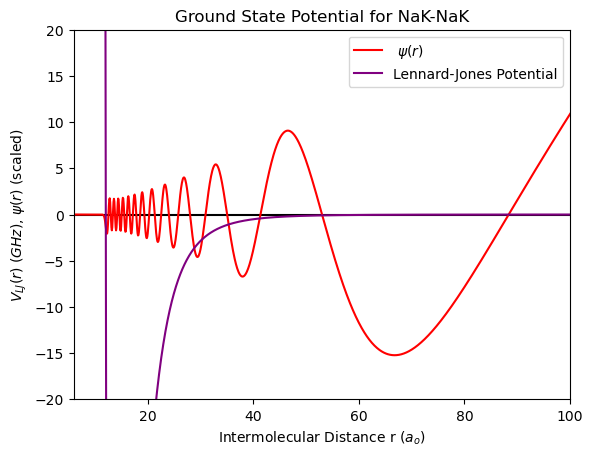

In [13]:
plt.hlines(0,0, R_grid[-1], color = 'black')
#psi_1prime = np.gradient(Psi_1, r) # first posistion derivate of wave function Psi
plt.plot(R_grid, 1e-1*Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
#plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
#plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

plt.plot(R_grid, VLJ*H_to_K, color = 'purple', label = 'Lennard-Jones Potential')
#plt.xlim(R1,R2+100)
plt.xlim(6,100)
#plt.ylim(min_v + 0.2*min_v, 0.1*abs(min_v))
plt.ylim(-20, 20)
#plt.ylim(-1e-12, 1e-12)
plt.ylabel('$V_{LJ}(r)$ $(GHz)$, $\\psi(r)$ (scaled)')
plt.xlabel('Intermolecular Distance r $(a_o)$')
plt.title('Ground State Potential for NaK-NaK')
plt.legend()

In [14]:
#r1_i = 1898 # index of r1 in larger grid
r1_i = 50# index of r1 in larger grid
#r2_i = 17875 # index of r2 in larger grid
r2_i = 4700 # index of r2 in larger grid

r1 = round(R_grid[r1_i],5) # ~10ao, smaller grid starting posistion
r2 = round(R_grid[r2_i],5) # ~300ao, larger grid ending posistion
print((r1, r2))

N_small = int((r2 - r1)/dr1) # number of points in smaller grid
ipap_p = np.arange(1,N_small, 1.0) # DVR paper indexing for smaller grid
r_grid = r1 + dr1*ipap_p # sub grid to calculate DVR and FC factor on

(7.58, 379.58)


In [15]:
def Hamiltonian_DVR(a, b, dx, C6_coef, KE_matrix): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    for i in range(100):
        rand1 = np.random.rand()
        rand2 = np.random.rand()
        rand3 = np.random.rand()

        Theta_A = np.arccos(1 - 2*rand1)
        Theta_B = np.arccos(1 - 2*rand2)
        PHI = 2*np.pi*rand3
        C_3_coef = ((d_NaK)**2)*(np.sin(Theta_A)*np.sin(Theta_B)*np.cos(PHI) - 2*np.cos(Theta_A)*np.cos(Theta_B))
        if C_3_coef > 0:
            break
    V_dip_dip = (C_3_coef)/(x**3)
    Vx = C6_coef/(x**6) - V_dip_dip # Excited potential
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing
    H_DVR = np.copy(KE_matrix) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))
    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] += Vmat[int(i)][int(j)]            
    assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    return H_DVR

In [16]:
time_start = time.time()
dr_DVR = 0.4
num_of_potentials = 20
xp_grids = []
Np = int((r2-r1)/dr_DVR) # Number of grid points
ipaperp = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
xp = r1 + dr_DVR*ipaperp # grid from paper
xp[0] = r1
xp[-1] = r2
xp_grids.append(xp)
Tmat = np.zeros((len(xp), len(xp))) # Initialize empty T matrix of size N-1 x N-1
KEmat = np.zeros((len(xp) + 10, len(xp) + 10))
for i in ipaperp:
    for j in ipaperp:
        if int(i) == int(j): # fill in diagonal components of the T matrix
            prefactorii = (np.pi**2)/(4*mu*(r2-r1)**2)
            bracketii = ((2*Np**2 + 1)/3) - (1/((np.sin(np.pi*(i/Np)))**2))  
            KEmat[int(i)][int(j)] = prefactorii*bracketii
            Tmat[int(i) - 1][int(j) - 1] = KEmat[int(i)][int(j)]
        if i != j: # fill in off-diagonal components of the T matrix
            diff = i - j
            prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(r2-r1)**2)
            bracketij = (1/((np.sin(np.pi*((diff)/(2*Np))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*Np))))**2))
            KEmat[int(i)][int(j)] = prefactorij*bracketij               
            Tmat[int(i) - 1][int(j) - 1] = KEmat[int(i)][int(j)]
time_end = time.time()
time_duration = time_end - time_start
print(f'Took {time_duration:.3f} seconds')

Took 4.378 seconds


In [17]:
#Intensity = 50 # laser intensity in W/cm^2
fo = 5.142206707e9	
c = 299792458
Ecgs_to_Eamu = (np.sqrt((4*np.pi*1e7)/c))*(299.792458)*(1/fo)
print(Ecgs_to_Eamu)
#E_0 = np.sqrt(Intensity)*Ecgs_to_Eamu
#print(E_0**2)

3.774554956807091e-08


In [18]:
def Sigma_PA_hw(omega_range, C12_coef, Bound_States, Bound_Energies, Collision_E, Intensity): # calculate cross section over a range of laser frequencies
    VLJ_PA = (C12_coef/(R_grid**12)) - (C6/(R_grid**6))
    Psi_Scattering = Numerov(Eo, N_big - 1, VLJ_PA, dr1, R_grid)
    wave_num_sq = 2*mu*Eo
    Gamma_vals = []
    FC_vals = []
    K_N = []
    E_0 = np.sqrt(Intensity)*Ecgs_to_Eamu
    U_squared = E_0**2
    for i in range(len(Bound_States)):
        for j in range(len(Bound_States[i])):
            FC_n = np.abs(np.trapz(np.conjugate(Bound_States[i][j])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
            FC_vals.append([FC_n, i, j])
            Gamma_n = 2*np.pi*U_squared*FC_n
            Gamma_vals.append(Gamma_n)
            Kn_num = -1*(Gamma_n*0.5)
            Detuning = (H_to_GHz*Bound_Energies[i][0][j] - omega_range)
            Kn_den = (H_to_GHz*Collision_E - Detuning) + I*gamma*0.5
            Kn = np.array((Kn_num/Kn_den))
            K_N.append(Kn)
    K = sum(K_N)
    S_num = 1 + I*K
    S_den = 1 + -1*I*K
    S = S_num/S_den
    S_prob = 1 - np.absolute(S)**2
    Sigma_PA_frequency = (S_prob)
    return(Sigma_PA_frequency, Gamma_vals, FC_vals)

1000
8.881784197001252e-16


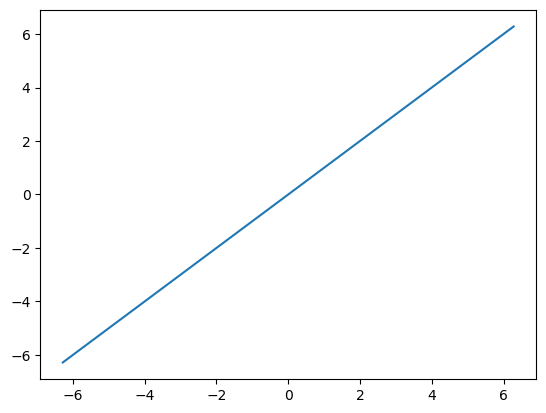

In [19]:
big_g = np.linspace(-2*np.pi, 2*np.pi, 1000)
small_g = np.linspace(-1*np.pi, np.pi, 1000)

cos = np.cos(big_g)
line = (small_g)

interp_b = scipy.interpolate.CubicSpline(big_g,cos)
interp_s = scipy.interpolate.CubicSpline(small_g,line)



integrand = (interp_s(small_g))*(interp_b(small_g))

#plt.plot(small_g, interp_b(small_g))
plt.plot(big_g, interp_s(big_g))

#plt.plot(small_g, integrand)

print(len(integrand))

Iint = np.trapz(integrand, small_g)
print(Iint)


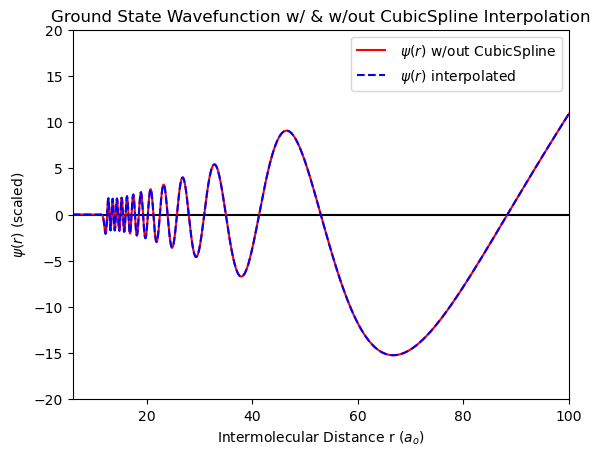

In [24]:
gs_interp = scipy.interpolate.CubicSpline(R_grid, Psi_1)

plt.hlines(0,0, R_grid[-1], color = 'black')
plt.plot(R_grid, 1e-1*Psi_1, label = f' $\\psi(r)$ w/out CubicSpline', color = 'red') 
plt.plot(R_grid, 1e-1*gs_interp(R_grid), label = f' $\\psi(r)$ interpolated', color = 'blue', linestyle = 'dashed')
plt.xlim(6,100)
#plt.ylim(min_v + 0.2*min_v, 0.1*abs(min_v))
plt.ylim(-20, 20)
#plt.ylim(-1e-12, 1e-12)
plt.ylabel('$\\psi(r)$ (scaled)')
plt.xlabel('Intermolecular Distance r $(a_o)$')
plt.title('Ground State Wavefunction w/ & w/out CubicSpline Interpolation')
plt.legend()

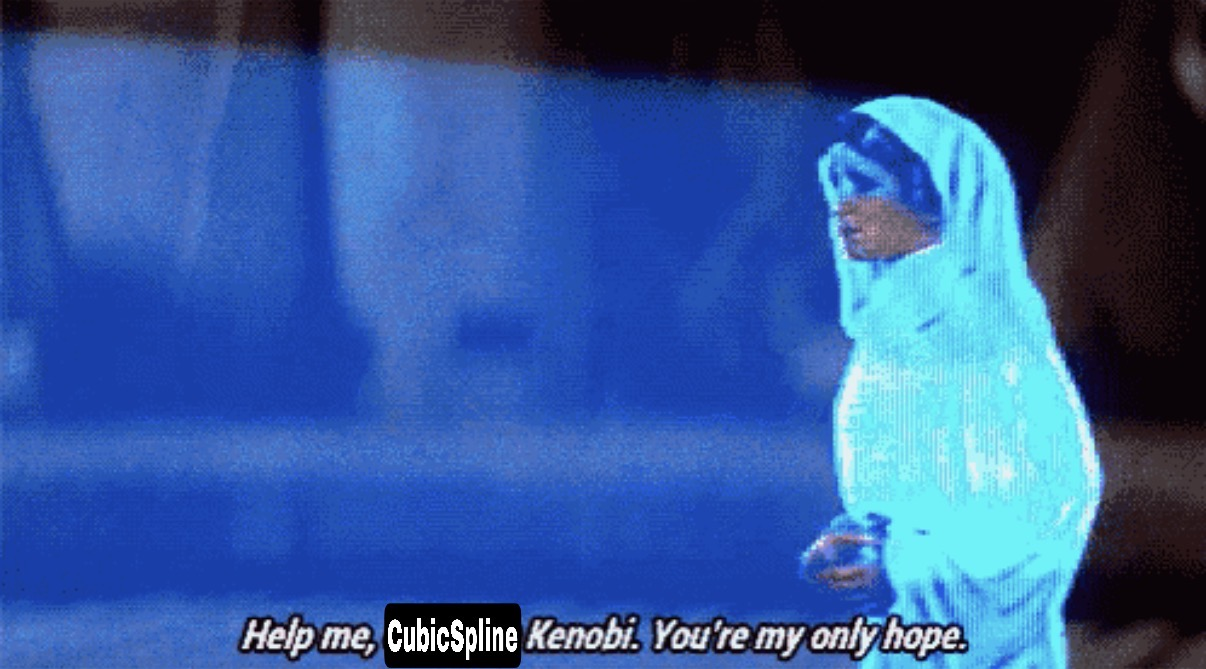

# Insert Cubic Spline

113


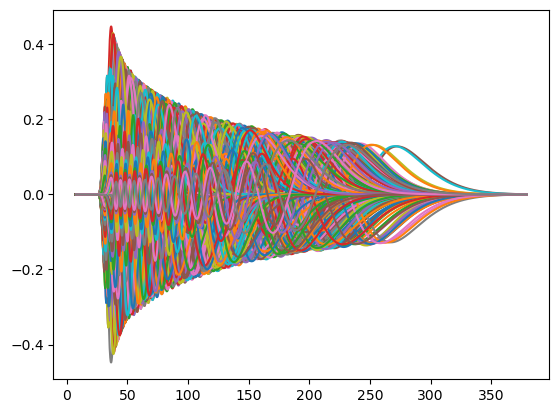

In [33]:
C6_test = 5e4
num_of_potentials = 200
H_vals_vecs = []
for i in range(num_of_potentials):  
    H_dr = Hamiltonian_DVR(r1, r2, dr_DVR, C6_test, Tmat)
    Heig = np.linalg.eigh(H_dr)[0]
    Heig = Heig[Heig<0]
    Eigvec = np.linalg.eigh(H_dr)[1]
    Hvec = []
    for j in range(len(Heig)):
        avec = Eigvec[:,j]
        Hvec.append(avec)
    for j in range(len(Hvec)):
        INT = np.trapz(np.abs(Hvec[j])**2,xp)
        A = 1/np.sqrt(INT)
        Hvec[j] = A*Hvec[j]
    H_vals_vecs.append([Heig,Hvec])

Phi_b = [ [] for i in range(num_of_potentials) ]
Ws = [ [] for i in range(num_of_potentials) ]
for i in range(num_of_potentials):
    w = 0
    if len(H_vals_vecs[i][0]) >= 10:
        while w <= int(len(H_vals_vecs[i][0]) - 5):
            interp_wavefct = interpolate.interp1d(xp, H_vals_vecs[i][1][w])
            Phi_B_interp = interp_wavefct(r_grid)
            Phi_b[i].append(Phi_B_interp)
            Ws[i].append(w)
            w += 1

#for i in range(len(Phi_b)):
#    for j in range(len(Phi_b[i])):
#        plt.plot(r_grid, Phi_b[i][j])

W = []
for i in range(len(Ws)):
    if len(Ws[i]) > 10:
        W.append([Ws[i][-1],i])
print(len(W))

Phi_b2 = [ [] for i in range(len(W)) ]
for i in range(len(W)):
    q = 0
    if len(H_vals_vecs[W[i][1]][0]) >= 10:
        while q <= int(len(H_vals_vecs[W[i][1]][0]) - 5):
            interp_wavefct2 = scipy.interpolate.CubicSpline(xp, H_vals_vecs[W[i][1]][1][q])
            Phi_B_interp2 = interp_wavefct2(r_grid)
            Phi_b2[i].append(Phi_B_interp2)
            q += 1

True_vals = []
for i in range(len(W)):
    q = 0
    Real_eigs = []
    if len(H_vals_vecs[W[i][1]][0]) >= 10:
        while q <= int(len(H_vals_vecs[W[i][1]][0]) - 5):
            Real_eigs.append(H_vals_vecs[W[i][1]][0][q])
            q += 1
        True_vals.append(Real_eigs)


for i in range(len(W)):
    for j in range(len(Phi_b2[i])):
        #plt.plot(r_grid, Phi_b2[i][j] + H_to_GHz*True_vals[i][0][j])
        plt.plot(r_grid, Phi_b2[i][j])

#plt.ylim(-2,0)

In [34]:
opop = [0,1,2,3]
lolmao = []

lolmao.append(opop)
print(lolmao)

[[0, 1, 2, 3]]


(150.0, 300.0)

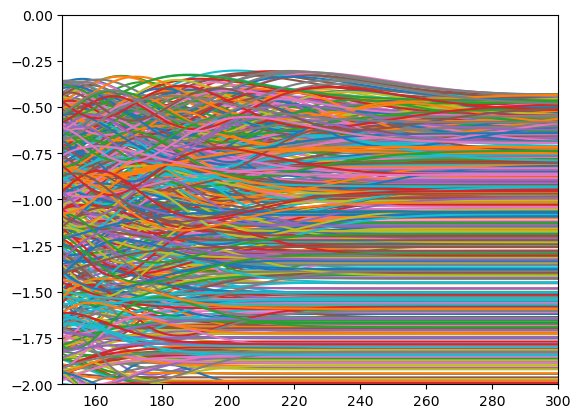

In [35]:
for i in range(len(W)):
    for j in range(len(Phi_b2[i])):
        plt.plot(r_grid, Phi_b2[i][j] + H_to_GHz*True_vals[i][j])
        #plt.plot(r_grid, Phi_b2[i][j])

plt.ylim(-2,0)
plt.xlim(150,300)

# Look at GS wavefunctions, find scattering lengths such that node at low freqeuncy shifts

In [37]:
print((r1_i, r2_i))

(50, 4700)


In [38]:
def Sigma_PA_hw_pot(omega_range, Vrr, Ground_State, Ground_grid, Bound_States, Bound_Energies, Collision_E, Intensity): # calculate cross section over a range of laser frequencies
     
    VLJ_PA = Vrr
    Psi_Scattering = scipy.interpolate.CubicSpline(Ground_grid, Ground_State)
    wave_num_sq = 2*mu*Eo
    Gamma_vals = []
    FC_vals = []
    K_N = []
    E_0 = np.sqrt(Intensity)*Ecgs_to_Eamu
    U_squared = E_0**2
    for i in range(len(Bound_States)):
        for j in range(len(Bound_States[i])):
            FC_n = np.abs(np.trapz(np.conjugate(Bound_States[i][j])*Psi_Scattering(r_grid), r_grid))**2
            FC_vals.append([FC_n, i, j])
            Gamma_n = 2*np.pi*U_squared*FC_n
            Gamma_vals.append(Gamma_n)
            Kn_num = -1*(Gamma_n*0.5)
            Detuning = (H_to_GHz*Bound_Energies[i][j] - omega_range)
            Kn_den = (H_to_GHz*Collision_E - Detuning) + I*gamma*0.5
            Kn = np.array((Kn_num/Kn_den))
            K_N.append(Kn)
   
    K = sum(K_N)
    S_num = 1 + I*K
    S_den = 1 + -1*I*K
    S = S_num/S_den
    S_prob = 1 - np.abs(S)**2
    Sigma_PA_frequency = (S_prob)
    return(Sigma_PA_frequency, Gamma_vals, FC_vals)

In [46]:
Omega_test_range = np.linspace(-7, -0.45, len(r_grid))
Sigma_test = Sigma_PA_hw_pot(Omega_test_range, VLJ, Psi_1, R_grid, Phi_b2, True_vals, Eo, 50)[0]

#plt.plot(Omega_test_range, np.log(Sigma_test))

In [226]:
def wavefunction_LJ(Energy, M, rmin, rmax, h, C6, C12): # Numerov method function to find psi(r)
    r_range = np.linspace(rmin, rmax, M - 1)
    psi = np.zeros(M-1)
    VLJ = (C12*(1/r_range**12)) - (C6*(1/r_range**6))
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = h # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - VLJ) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,M - 1):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(h**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(h**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(h**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, r_range) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

def Psilinear(wavefct, r_range):
    
    
    m = (wavefct[-1] - wavefct[-2])*(1/(r_range[-1] - r_range[-2]))
    b = wavefct[-1] - (m*r_range[-1])
    y = m*r_range + b
    ro = -b/m
    return [y,ro]


In [228]:

C12I = 3e10 # C12 coefficient in Eh*a0^12
C6I = 3.3e-2*2e5 # C6 coefficient in Eh*a0^6

#linepsi = Psilinear(rr)
#plt.plot(rr, linepsi[0], label = 'f(r) trace', color = 'lightsalmon')
#Eo = 3.166808534191e-12 #initial energy in Hartrees, Eo = 1uK
#r1 = 4 # starting iteration distance in ao
#r2 = 704 # ending iteration distance ao
#numpts = int(((r2 - r1)*(1/dr1)) + 1) # number of points between r1, r2 given step size dr
#rr = np.linspace(r1,r2, numpts) # radial distance grid

# CUBIC SPLINE D1

In [344]:
C12_test_list1 = np.linspace(3.5e10, 8e10, 10)
depths1 = []
drs1 = []
for i in range(len(C12_test_list1)):
    An_LJpot = (C12_test_list1[i]/(R_grid**12)) - (C6I/(R_grid**6))
    a_minn = min(An_LJpot)
    depths1.append(a_minn*H_to_K)
    print(a_minn*H_to_K)

    k_max = np.sqrt(2*mu*(Eo - a_minn))
    lamb_min = (2*np.pi)*(1/k_max)
    drs1.append(lamb_min*0.05)

-98.22916441700785
-85.96229934874866
-76.40186994211756
-68.77496800044398
-62.523464744447395
-57.31308652616917
-52.89965944925126
-49.123566462981756
-45.84549190240419
-42.984599209980104


In [346]:
print(C12_test_list1[0])
print(drs1[0])

35000000000.0
0.05294616692561802


In [348]:
def scattering_lengths(C12_array, spacing_grid):
    as_C12 = []
    for i in range(len(C12_array)):
        Current_C12 = C12_array[i]
        Current_spacing = spacing_grid[i]

        numpts_a = int(((r2 - r1)*(1/Current_spacing)) + 1) # number of points between r1, r2 given step size dr
        rr_a = np.linspace(r1, r2, numpts_a) # radial distance grid
        
        psi = np.zeros(numpts_a)
        Psi = wavefunction_LJ(0, numpts_a, r1, r2, Current_spacing, C6I, Current_C12)
        linepsi = Psilinear(Psi, rr_a)
        as_C12.append(linepsi[1])
       # if i == int(0.5*len(C12_array)):
       #     print('half way there!')
       # if i == int(0.9*len(C12_array)):
       #     print('almost there!')

    return as_C12

In [350]:
test_a = scattering_lengths(C12_test_list1, drs1)

(-1000.0, 1000.0)

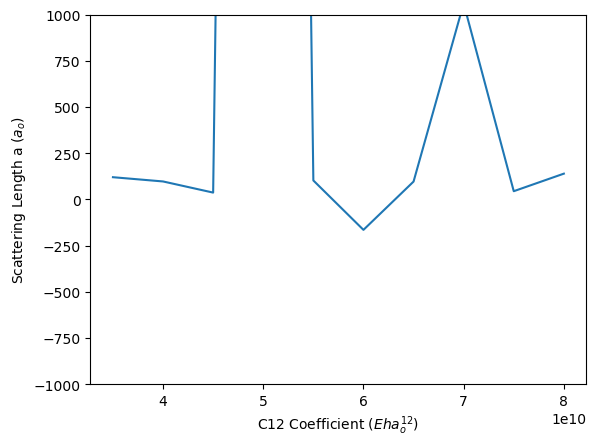

In [352]:
plt.plot(C12_test_list1, test_a)
plt.xlabel('C12 Coefficient $(Eh a_o^{12})$')
plt.ylabel('Scattering Length a $(a_o)$')
plt.ylim(-1000,1000)

In [437]:
#print(len(C12_deep[0]))
#print(len(C12_deep))
#print(len(drs1))

C12_deep1 = []
for i in range(len(C12_test_list1)):
    a_C12array1 = np.linspace(C12_test_list1[i] - 0.8e10, C12_test_list1[i] + 0.8e10, 3000)
    C12_deep1.append(a_C12array1)
drs_deep1 = []
for i in range(len(drs1)):
    my_num = drs1[i]
    my_length = len(C12_deep1[i])
    dr1_list = [my_num] * my_length
    
    drs_deep1.append(dr1_list)
#print(drs1[0])

print(len(drs_deep1))
print(len(drs_deep1[0]))

10
3000


In [439]:
the_as1 = []
for j in range(len(C12_deep1)):
    sum_as1 = scattering_lengths(C12_deep1[j], drs_deep[j])
    the_as1.append(sum_as1)
    print(j)
    #if i == int(0.2*len(C12_deep)):
    #    print("it's running!")
    #if i == int(0.5*len(C12_deep)):
    #    print('half way there!')
    #if i == int(0.9*len(C12_deep)):
    #    print('almost there!')
    

0
1
2
3
4
5
6
7
8
9


In [440]:
hund_indexes1 = []
for i in range(len(the_as1)):
    find_count = 0
    for j in range(len(the_as1[i])):
        if abs(the_as1[i][j] - 100) < 1:
            find_count += 1
            if find_count == 1:
                hund_indexes1.append(j)
            

print(len(hund_indexes1))
print(len(the_as1))

10
10


In [441]:
for i in range(len(the_as1)):
    print(the_as1[i][hund_indexes1[i]])
#print(len(the_as))

99.2429521082992
99.21741711600482
99.18166309890461
99.1724474590904
99.14055873766762
99.07184601514223
99.0776492448484
99.02837130740303
99.03812767998068
99.0469995051506


In [442]:
for i in range(len(hund_indexes1)):
    print(C12_deep[i][hund_indexes1[i]])

30131710570.190063
34619539846.61554
40062354118.039345
46689563187.72924
54895965321.773926
54880960320.106705
65136045348.449486
65110370123.37446
78027675891.96399
78034011337.11237


In [443]:
print(r1,r2)

7.58 379.58


In [444]:
psi_D1 = []
GS_D1 = []
R_grids_D1 = []
depths1_real = []
drss1 = 0.05
for i in range(len(hund_indexes1[0:9])):

    N_D1 = int((R2-R1)/drs_deep1[i][0])
    print(N_D1)
    ipap_D1 = np.arange(1,N_D1, 1.0)
    R_grid_D1 = R1 + drs_deep1[i][0]*ipap_D1
    R_grids_D1.append(R_grid_D1)
    VLJ_D1 = (C12_deep1[i][hund_indexes1[i]]/(R_grid_D1**12)) - (C6I/(R_grid_D1**6))
    min_d1 = min(VLJ_D1)
    depths1_real.append(H_to_K*min_d1)
    GS_D1.append(VLJ_D1)
    Psi_D1 = Numerov(Eo, N_D1-1, VLJ_D1, drs_deep1[i][0], R_grid_D1) # wave function Psi
    D1_interp = scipy.interpolate.CubicSpline(R_grid_D1, Psi_D1)
    psi_D1.append(D1_interp(R_grid_D1))

            

13230
12376
11668
11070
10555
10106
9709
9356
9038


In [445]:
for i in range(len(R_grids_D1)):
    print(f'len R grid = {len(R_grids_D1[i])}')
    print(f'len psi = {len(psi_D1[i])}')

len R grid = 13229
len psi = 13229
len R grid = 12375
len psi = 12375
len R grid = 11667
len psi = 11667
len R grid = 11069
len psi = 11069
len R grid = 10554
len psi = 10554
len R grid = 10105
len psi = 10105
len R grid = 9708
len psi = 9708
len R grid = 9355
len psi = 9355
len R grid = 9037
len psi = 9037


In [446]:
Omega_1 = np.linspace(-7,0,len(r_grid))
Crosses1 = []
for i in range(len(psi_D1)):
    #Omega_1 = np.linspace(-7,0,len(sub_grids[i]))
    Sigma_D1 = Sigma_PA_hw_pot(Omega_1, GS_D1[i], psi_D1[i], R_grids_D1[i], Phi_b2, True_vals, Eo, 50)
    Crosses1.append(Sigma_D1[0])


(0.0, 20.0)

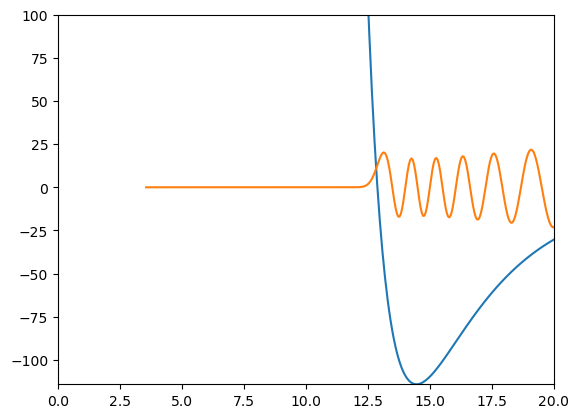

In [447]:
for i in range(len(psi_D1)):
    if i == 0:
        plt.plot(R_grids_D1[i], H_to_K*GS_D1[i], label = f'Depth = {round(depths1_real[i],2)}K')
        plt.plot(R_grids_D1[i], psi_D1[i], label = f'Depth = {round(depths1_real[i],2)}K')

        plt.ylim(min(H_to_K*GS_D1[i]), 100)
plt.xlim(0,20)

(-7.7, -7.4)

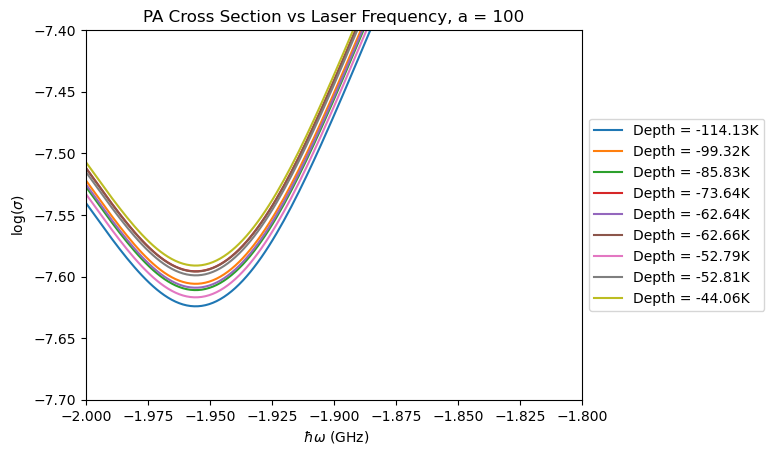

In [448]:
for i in range(len(psi_D1)):
    if 0 <= i <= 9:
    #if i % 5 == 0:
        plt.plot(Omega_1, np.log(Crosses1[i]), label = f'Depth = {round(depths1_real[i],2)}K')
   ## else:
    #    plt.plot(Omega_1, np.log(Crosses[i]), label = f'Depth = {round(depths1_real[i],2)}K')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('log($\\sigma$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')

plt.xlim(-2,-1.8)
plt.ylim(-7700/1000,-7400/1000)

-114.12525713200549


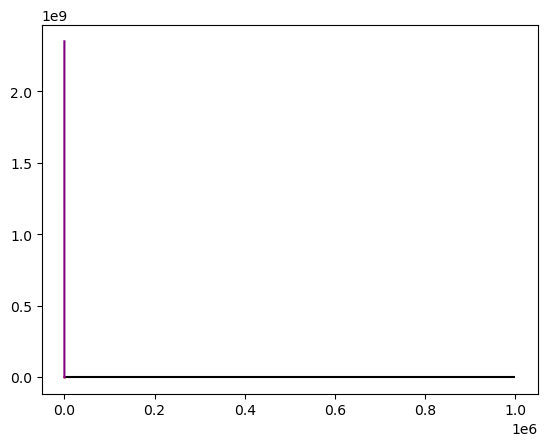

In [449]:
plt.hlines(0,0,1000000, color = 'black')
plt.vlines(r6, -100, 100, color = 'gold')

for i in range(len(psi_D1)):
    if i == 0:
        plt.plot(R_grids_D1[i], 0.1*psi_D1[i], label = f'Depth = {round(depths1_real[i],2)}K', color = 'red')
        plt.plot(R_grids_D1[i], H_to_K*GS_D1[i], label = f'Depth = {round(depths1_real[i],2)}K', color = 'purple')
        print(min(H_to_K*GS_D1[i]))
        fix = min(H_to_K*GS_D1[i])

#plt.plot(R_grids_D1[9], 0.1*psi_D1[9], label = f'Depth = {round(depths1_real[9],2)}K', color = 'green')


#plt.xlim(R1,R2+100)
#plt.xlim(0,300)
#plt.ylim(min_v + 0.2*min_v, 0.1*abs(min_v))
#plt.ylim(-27e3, 100)
#plt.ylim(-1e-12, 1e-12)
#plt.ylabel('$V_{LJ}(r)$ $(K)$, $\\psi(r)$ (scaled)')
#plt.xlabel('Intermolecular Distance r $(a_o)$')
#plt.title('Ground State Potential for NaK-NaK')
#plt.legend()

# D2 Deeper potentials...

In [539]:
C12_test_list2 = np.linspace(1.5e10, 2.5e10, 6)
depths2 = []
drs2 = []
for i in range(len(C12_test_list2)):
    An_LJpot = (C12_test_list2[i]/(R_grid**12)) - (C6/(R_grid**6))
    a_minn = min(An_LJpot)
    depths2.append(a_minn*H_to_K)
    print(a_minn*H_to_K)

    k_max = np.sqrt(2*mu*(Eo - a_minn))
    lamb_min = (2*np.pi)*(1/k_max)
    drs2.append(lamb_min*0.05)

-229.2473378223859
-202.2217594496063
-180.95187350929683
-163.71702416532864
-149.51273083231874
-137.52157848284168


In [541]:
test_a2 = scattering_lengths(C12_test_list2, drs2)

(-1000.0, 1000.0)

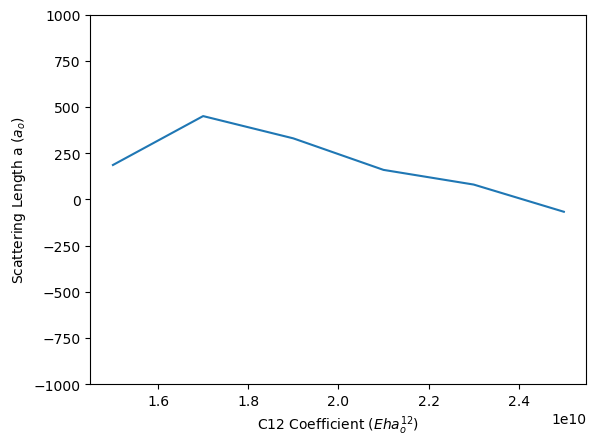

In [543]:
plt.plot(C12_test_list2, test_a2)
plt.xlabel('C12 Coefficient $(Eh a_o^{12})$')
plt.ylabel('Scattering Length a $(a_o)$')
plt.ylim(-1000,1000)

In [545]:
C12_deep2 = []
for i in range(len(C12_test_list2)):
    a_C12array2 = np.linspace(C12_test_list2[i] - 0.4e10, C12_test_list2[i] + 0.4e10, 3000)
    C12_deep2.append(a_C12array2)
drs_deep2 = []
for i in range(len(drs2)):
    my_num = drs2[i]
    my_length = len(C12_deep2[i])
    dr2_list = [my_num] * my_length
    
    drs_deep2.append(dr2_list)
#print(drs1[0])

print(len(drs_deep2))
print(len(drs_deep2[0]))

6
3000


In [547]:
the_as2 = []
for j in range(len(C12_deep2)):
    sum_as2 = scattering_lengths(C12_deep2[j], drs_deep2[j])
    the_as2.append(sum_as2)
    print(j)

0
1
2
3
4
5


In [548]:
hund_indexes2 = []
for i in range(len(the_as2)):
    find_count = 0
    for j in range(len(the_as2[i])):
        if abs(the_as2[i][j] - 100) < 1:
            find_count += 1
            if find_count == 1:
                hund_indexes2.append(j)
            

print(len(hund_indexes2))
print(len(the_as2))

6
6


In [549]:
for i in range(len(the_as2)):
    print(the_as2[i][hund_indexes2[i]])

99.0077181898208
99.36988419227752
99.27511650841646
99.27550906685873
99.1231970720157
99.1429417408276


In [550]:
for i in range(len(hund_indexes2)):
    print(C12_deep2[i][hund_indexes2[i]])

11906968989.663221
13178726242.080694
16325775258.419474
18275091697.23241
20552517505.835278
23222074024.674892


In [551]:
psi_D2 = []
GS_D2 = []
R_grids_D2 = []
depths2_real = []

for i in range(len(hund_indexes2)):

    N_D2 = int((R2-R1)/drs_deep2[i][0])
    print(N_D2)
    ipap_D2 = np.arange(1,N_D2, 1.0)
    R_grid_D2 = R1 + drs_deep2[i][0]*ipap_D2
    R_grids_D2.append(R_grid_D2)
    VLJ_D2 = (C12_deep2[i][hund_indexes2[i]]/(R_grid_D2**12)) - (C6I/(R_grid_D2**6))
    min_d2 = min(VLJ_D2)
    depths2_real.append(H_to_K*min_d2)
    GS_D2.append(VLJ_D2)
    Psi_D2 = Numerov(Eo, N_D2-1, VLJ_D2, drs_deep2[i][0], R_grid_D2) # wave function Psi
    D2_interp = scipy.interpolate.CubicSpline(R_grid_D2, Psi_D2)
    psi_D2.append(D2_interp(R_grid_D2))

20211
18983
17957
17080
16322
15654


In [552]:
Omega_1 = np.linspace(-7,0,len(r_grid))
Crosses2 = []
for i in range(len(psi_D2)):
    #Omega_1 = np.linspace(-7,0,len(sub_grids[i]))
    Sigma_D2 = Sigma_PA_hw_pot(Omega_1, GS_D2[i], psi_D2[i], R_grids_D2[i], Phi_b2, True_vals, Eo, 50)
    Crosses2.append(Sigma_D2[0])

(0.0, 20.0)

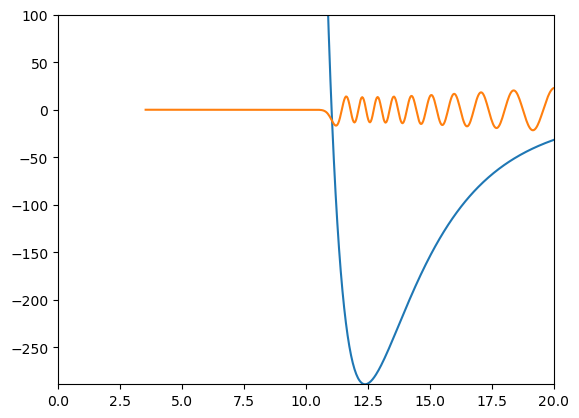

In [553]:
for i in range(len(psi_D2)):
    if i == 0:
        plt.plot(R_grids_D2[i], H_to_K*GS_D2[i], label = f'Depth = {round(depths2_real[i],2)}K')
        plt.plot(R_grids_D2[i], psi_D2[i], label = f'Depth = {round(depths2_real[i],2)}K')

        plt.ylim(min(H_to_K*GS_D2[i]), 100)
plt.xlim(0,20)

(-7.7, -7.4)

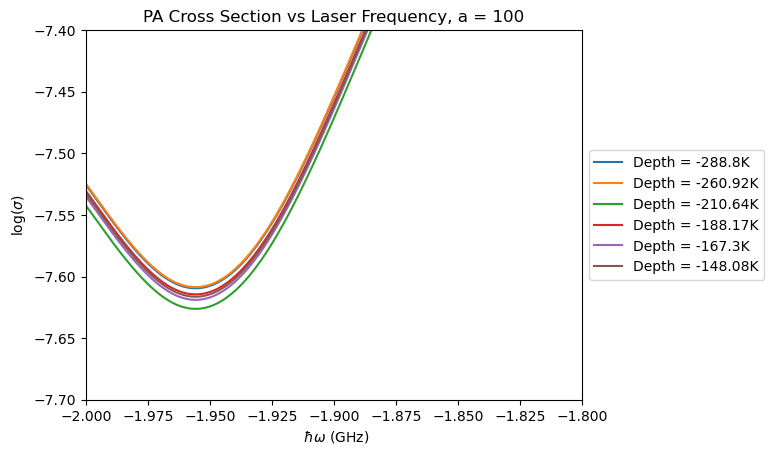

In [554]:
for i in range(len(psi_D2)):
    plt.plot(Omega_1, np.log(Crosses2[i]), label = f'Depth = {round(depths2_real[i],2)}K')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('log($\\sigma$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')

plt.xlim(-2,-1.8)
plt.ylim(-7700/1000,-7400/1000)

# D3 Deeper still...

In [708]:
C12_test_list3 = np.linspace(0.45e10, 0.6e10, 5)
depths3 = []
drs3 = []
for i in range(len(C12_test_list3)):
    An_LJpot = (C12_test_list3[i]/(R_grid**12)) - (C6I/(R_grid**6))
    a_minn = min(An_LJpot)
    depths3.append(a_minn*H_to_K)
    print(a_minn*H_to_K)

    k_max = np.sqrt(2*mu*(Eo - a_minn))
    lamb_min = (2*np.pi)*(1/k_max)
    drs3.append(lamb_min*0.05)

-764.1541294455504
-705.2211561823779
-654.8843307276578
-611.3209658296993
-572.999959185211


In [710]:
test_a3 = scattering_lengths(C12_test_list3, drs3)

(-1000.0, 1000.0)

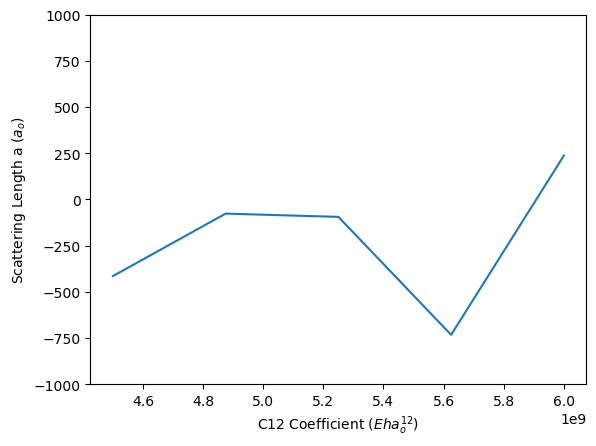

In [712]:
plt.plot(C12_test_list3, test_a3)
plt.xlabel('C12 Coefficient $(Eh a_o^{12})$')
plt.ylabel('Scattering Length a $(a_o)$')
plt.ylim(-1000,1000)

In [714]:
C12_deep3 = []
for i in range(len(C12_test_list3)):
    a_C12array3 = np.linspace(C12_test_list3[i] - 0.2e10, C12_test_list3[i] + 0.2e10, 3000)
    C12_deep3.append(a_C12array3)
drs_deep3 = []
for i in range(len(drs3)):
    my_num = drs3[i]
    my_length = len(C12_deep3[i])
    dr3_list = [my_num] * my_length
    
    drs_deep3.append(dr3_list)
#print(drs1[0])

print(len(drs_deep3))
print(len(drs_deep3[0]))

5
3000


In [716]:
the_as3 = []
for j in range(len(C12_deep3)):
    sum_as3 = scattering_lengths(C12_deep3[j], drs_deep3[j])
    the_as3.append(sum_as3)
    print(j)

0
1
2
3
4


In [717]:
hund_indexes3 = []
for i in range(len(the_as3)):
    find_count = 0
    for j in range(len(the_as3[i])):
        if abs(the_as3[i][j] - 100) < 1:
            find_count += 1
            if find_count == 1:
                hund_indexes3.append(j)
            

print(len(hund_indexes3))
print(len(the_as3))

5
5


In [718]:
for i in range(len(the_as3)):
    print(the_as3[i][hund_indexes3[i]])

99.49496780264741
100.76522493198586
100.39971957304677
99.83232454245669
99.62048684867887


In [719]:
for i in range(len(hund_indexes3)):
    print(C12_deep[i][hund_indexes3[i]])

27314771590.530178
32160053351.11704
37245415138.37946
42629543181.060356
47208069356.45215


In [720]:
psi_D3 = []
GS_D3 = []
R_grids_D3 = []
depths3_real = []
for i in range(len(hund_indexes3[0:9])):

    N_D3 = int((R2-R1)/drs_deep3[i][0])
    print(N_D3)
    ipap_D3 = np.arange(1,N_D3, 1.0)
    R_grid_D3 = R1 + drs_deep3[i][0]*ipap_D3
    R_grids_D3.append(R_grid_D3)
    VLJ_D3 = (C12_deep3[i][hund_indexes3[i]]/(R_grid_D3**12)) - (C6I/(R_grid_D3**6))
    min_d3 = min(VLJ_D3)
    depths3_real.append(H_to_K*min_d3)
    GS_D3.append(VLJ_D3)
    Psi_D3 = Numerov(Eo, N_D3-1, VLJ_D3, drs_deep3[i][0], R_grid_D3) # wave function Psi
    D3_interp = scipy.interpolate.CubicSpline(R_grid_D3, Psi_D3)
    psi_D3.append(D3_interp(R_grid_D3))

36901
35449
34161
33005
31954


In [721]:
Omega_1 = np.linspace(-7,0,len(r_grid))
Crosses3 = []
for i in range(len(psi_D3)):
    #Omega_1 = np.linspace(-7,0,len(sub_grids[i]))
    Sigma_D3 = Sigma_PA_hw_pot(Omega_1, GS_D3[i], psi_D3[i], R_grids_D3[i], Phi_b2, True_vals, Eo, 50)
    Crosses3.append(Sigma_D3[0])

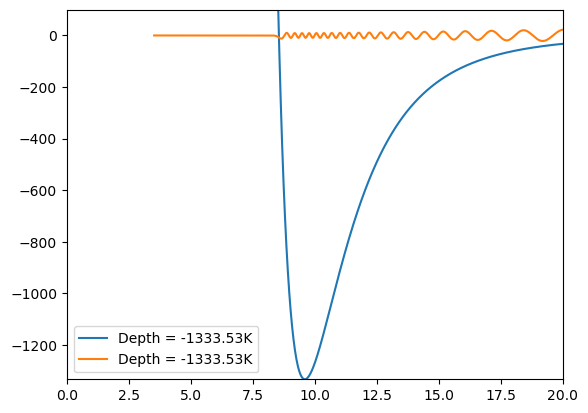

In [722]:
for i in range(len(psi_D3)):
    if i == 0:
        plt.plot(R_grids_D3[i], H_to_K*GS_D3[i], label = f'Depth = {round(depths3_real[i],2)}K')
        plt.plot(R_grids_D3[i], psi_D3[i], label = f'Depth = {round(depths3_real[i],2)}K')

        plt.ylim(min(H_to_K*GS_D3[i]), 100)
plt.xlim(0,20)
plt.legend()

(-7.67, -7.4)

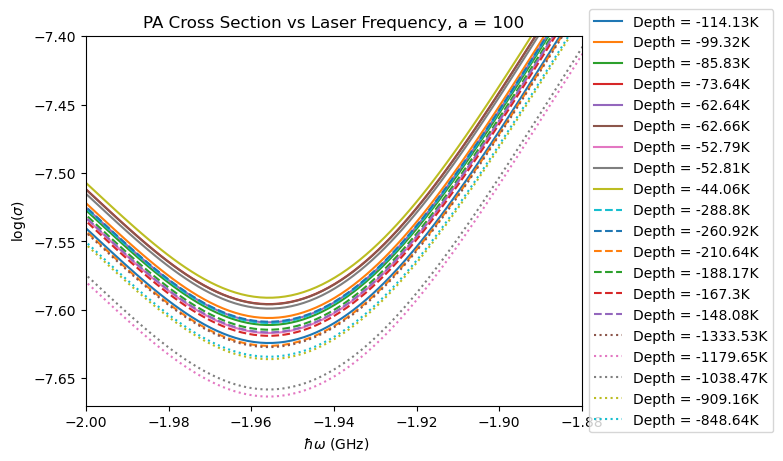

In [732]:
for i in range(len(psi_D1)):
    plt.plot(Omega_1, np.log(Crosses1[i]), label = f'Depth = {round(depths1_real[i],2)}K')

for i in range(len(psi_D2)):
    plt.plot(Omega_1, np.log(Crosses2[i]), label = f'Depth = {round(depths2_real[i],2)}K', linestyle = 'dashed')

for i in range(len(psi_D3)):
    plt.plot(Omega_1, np.log(Crosses3[i]), label = f'Depth = {round(depths3_real[i],2)}K', linestyle = 'dotted')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('log($\\sigma$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')

plt.xlim(-2,-1.88)
plt.ylim(-7.67,-7.4)

# A little bit deeper...

In [600]:
C12_test_list4 = np.linspace(0.9e9, 9e9, 6)
depths4 = []
drs4 = []
for i in range(len(C12_test_list4)):
    An_LJpot = (C12_test_list4[i]/(R_grid**12)) - (C6I/(R_grid**6))
    a_minn = min(An_LJpot)
    depths4.append(a_minn*H_to_K)
   # print(a_minn*H_to_K)

    k_max = np.sqrt(2*mu*(Eo - a_minn))
    lamb_min = (2*np.pi)*(1/k_max)
    drs4.append(lamb_min*0.05)

In [602]:
test_a4 = scattering_lengths(C12_test_list4, drs4)

(-1000.0, 1000.0)

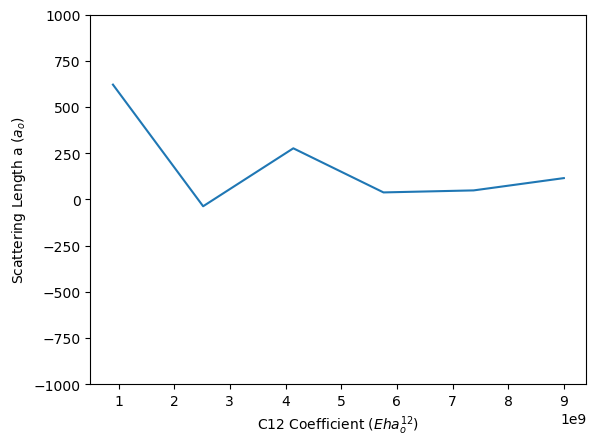

In [603]:
plt.plot(C12_test_list4, test_a4)
plt.xlabel('C12 Coefficient $(Eh a_o^{12})$')
plt.ylabel('Scattering Length a $(a_o)$')
plt.ylim(-1000,1000)

In [605]:
C12_deep4 = []
for i in range(len(C12_test_list4)):
    a_C12array4 = np.linspace(C12_test_list4[i] - 1e9, C12_test_list4[i] + 1e9, 3000)
    C12_deep4.append(a_C12array4)
drs_deep4 = []
for i in range(len(drs4)):
    my_num = drs4[i]
    my_length = len(C12_deep4[i])
    dr4_list = [my_num] * my_length
    
    drs_deep4.append(dr4_list)
#print(drs1[0])

print(len(drs_deep4))
print(len(drs_deep4[0]))

6
3000


In [608]:
the_as4 = []
for j in range(len(C12_deep4)):
    sum_as4 = scattering_lengths(C12_deep4[j], drs_deep4[j])
    the_as4.append(sum_as4)
    print(j)

0
1
2
3
4
5


In [609]:
hund_indexes4 = []
for i in range(len(the_as4)):
    find_count = 0
    for j in range(len(the_as4[i])):
        if abs(the_as4[i][j] - 100) < 1:
            find_count += 1
            if find_count == 1:
                hund_indexes4.append(j)
            

print(len(hund_indexes4))
print(len(the_as4))

6
6


In [610]:
for i in range(len(the_as4)):
    print(the_as4[i][hund_indexes4[i]])

99.27057677706668
100.48817267265586
99.15388763142067
99.06723083403999
99.07339586305449
99.0488005688297


In [611]:
psi_D4 = []
GS_D4 = []
R_grids_D4 = []
depths4_real = []
for i in range(len(hund_indexes4)):

    N_D4 = int((R2-R1)/drs_deep4[i][0])
    print(N_D4)
    ipap_D4 = np.arange(1,N_D4, 1.0)
    R_grid_D4 = R1 + drs_deep4[i][0]*ipap_D4
    R_grids_D4.append(R_grid_D4)
    VLJ_D4 = (C12_deep4[i][hund_indexes4[i]]/(R_grid_D4**12)) - (C6I/(R_grid_D4**6))
    min_d4 = min(VLJ_D4)
    depths4_real.append(H_to_K*min_d4)
    GS_D4.append(VLJ_D4)
    Psi_D4 = Numerov(Eo, N_D4-1, VLJ_D4, drs_deep4[i][0], R_grid_D4) # wave function Psi
    D4_interp = scipy.interpolate.CubicSpline(R_grid_D4, Psi_D4)
    psi_D4.append(D4_interp(R_grid_D4))

82514
49308
38472
32611
28814
26093


In [612]:
Omega_1 = np.linspace(-7,0,len(r_grid))
Crosses4 = []
for i in range(len(psi_D4)):
    #Omega_1 = np.linspace(-7,0,len(sub_grids[i]))
    Sigma_D4 = Sigma_PA_hw_pot(Omega_1, GS_D4[i], psi_D4[i], R_grids_D4[i], Phi_b2, True_vals, Eo, 50)
    Crosses4.append(Sigma_D4[0])

(0.0, 20.0)

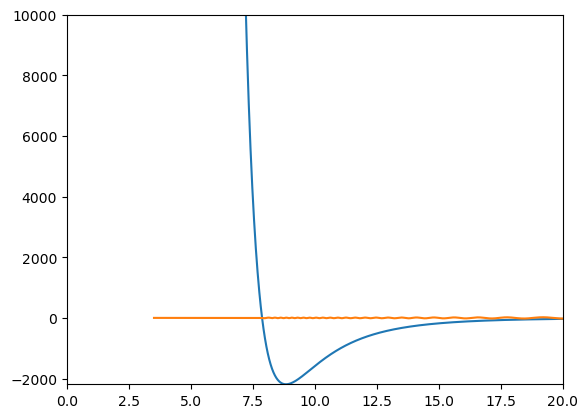

In [626]:
for i in range(len(psi_D4)):
    if i == 1:
        plt.plot(R_grids_D4[i], H_to_K*GS_D4[i], label = f'Depth = {round(depths4_real[i],2)}K')
        plt.plot(R_grids_D4[i], psi_D4[i], label = f'Depth = {round(depths4_real[i],2)}K')

        plt.ylim(min(H_to_K*GS_D4[i]), 10000)
plt.xlim(0,20)

(-4.35, -4.13)

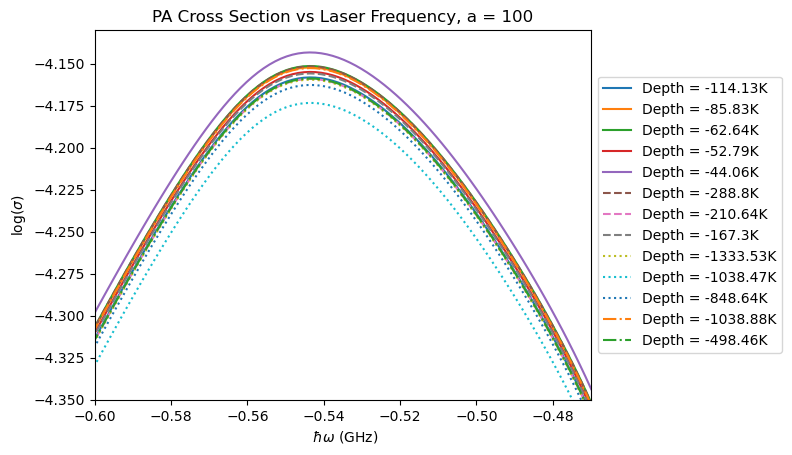

In [752]:
for i in range(len(psi_D1)):
    if i % 2 == 0:
        plt.plot(Omega_1, np.log(Crosses1[i]), label = f'Depth = {round(depths1_real[i],2)}K')

for i in range(len(psi_D2)):
    if i % 2 == 0:
       plt.plot(Omega_1, np.log(Crosses2[i]), label = f'Depth = {round(depths2_real[i],2)}K', linestyle = 'dashed')

for i in range(len(psi_D3)):
    if i % 2 == 0:
        plt.plot(Omega_1, np.log(Crosses3[i]), label = f'Depth = {round(depths3_real[i],2)}K', linestyle = 'dotted')

for i in range(len(psi_D4)):
    if i > 0:
        if i % 2 == 0:
            plt.plot(Omega_1, np.log(Crosses4[i]), label = f'Depth = {round(depths4_real[i],2)}K', linestyle = 'dashdot')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('log($\\sigma$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')

#plt.xlim(-2,-1.88)
#plt.ylim(-7.67,-7.4)

plt.xlim(-0.6,-0.47)
plt.ylim(-4.35,-4.13)

(-7.67, -7.4)

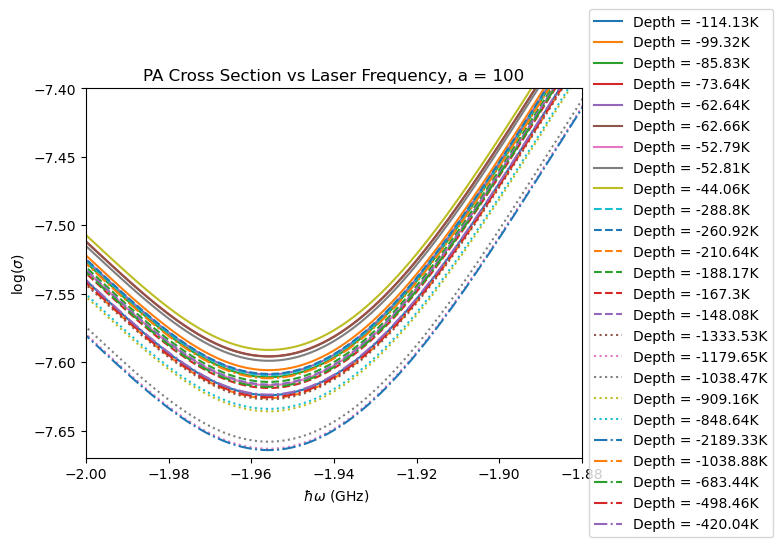

In [754]:
for i in range(len(psi_D1)):
    plt.plot(Omega_1, np.log(Crosses1[i]), label = f'Depth = {round(depths1_real[i],2)}K')

for i in range(len(psi_D2)):
    plt.plot(Omega_1, np.log(Crosses2[i]), label = f'Depth = {round(depths2_real[i],2)}K', linestyle = 'dashed')

for i in range(len(psi_D3)):
    plt.plot(Omega_1, np.log(Crosses3[i]), label = f'Depth = {round(depths3_real[i],2)}K', linestyle = 'dotted')

for i in range(len(psi_D4)):
    if i > 0:
        plt.plot(Omega_1, np.log(Crosses4[i]), label = f'Depth = {round(depths4_real[i],2)}K', linestyle = 'dashdot')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('log($\\sigma$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')


plt.xlim(-2,-1.88)
plt.ylim(-7.67,-7.4)

Text(0.5, 1.0, 'PA Cross Section vs Laser Frequency, a = 100')

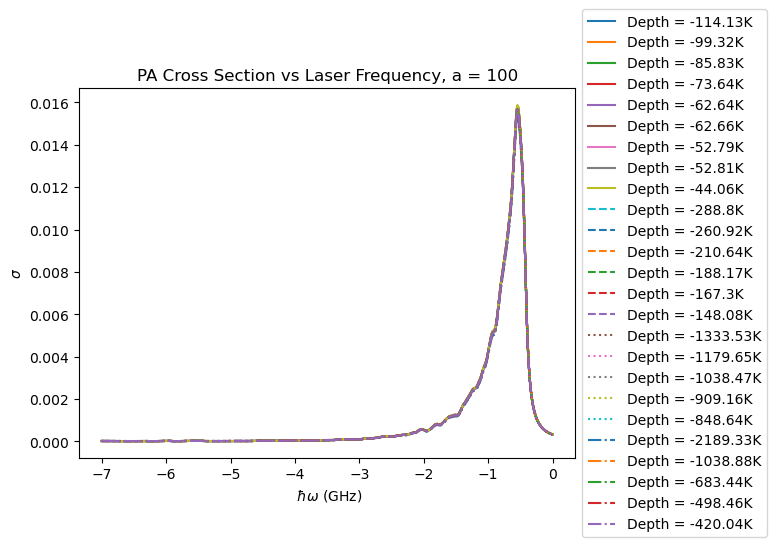

In [740]:
for i in range(len(psi_D1)):
    plt.plot(Omega_1, Crosses1[i], label = f'Depth = {round(depths1_real[i],2)}K')

for i in range(len(psi_D2)):
    plt.plot(Omega_1, Crosses2[i], label = f'Depth = {round(depths2_real[i],2)}K', linestyle = 'dashed')

for i in range(len(psi_D3)):
    plt.plot(Omega_1, Crosses3[i], label = f'Depth = {round(depths3_real[i],2)}K', linestyle = 'dotted')

for i in range(len(psi_D4)):
    if i > 0:
        plt.plot(Omega_1, Crosses4[i], label = f'Depth = {round(depths4_real[i],2)}K', linestyle = 'dashdot')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('$\\sigma$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PA Cross Section vs Laser Frequency, a = 100')

#plt.xlim(-0.8,-0.4)
#plt.ylim(0, 0.05)
#plt.ylim(0.006, 0.017)




In [668]:
print(Crosses1[0] - Crosses2[0])

[ 2.89728778e-07  2.90327653e-07  2.90796504e-07 ... -2.31876825e-06
 -2.30690752e-06 -2.29514293e-06]


# TO CHECK
## CrossesD3 looks fishy, should verify code is implemented correctly...